In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip -qq install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00


# STEP 1: Training YOLOv8 using 14 Classes Dataset

[Hyper-parameters tuning ranges](https://docs.ultralytics.com/modes/train/#train-settings)

In [ ]:
# Tuning YOLO over 14 classes dataset

from ultralytics import YOLO

model = YOLO("yolov8l-seg.pt")
data_path = "/content/drive/MyDrive/Repair Project/report/data/14c"
result_path = "/content/drive/MyDrive/Repair Project/report/results/tuning/14c"


search_space = {
    "lr0": (1e-5, 1e-1),
    "momentum":(0.6, 0.98),
    "weight_decay":(0.0, 0.001),
    "hsv_h": (0.0, 0.1),
    "hsv_s": (0.0, 0.9),
    "hsv_v": (0.0, 0.9),
    "scale": (0.0, 0.9),
    "box": (0.02, 0.2)

  }

model.tune(
    data= data_path + "/data.yaml",
    epochs=20,
    iterations=50,
    optimizer="AdamW",
    project=result_path,
    space=search_space,
    plots=True,
    save=True,
    val=False,
    device="cuda"
)

In [ ]:
# Training over Best Found Hyper-parameters
from ultralytics import YOLO
import torch
torch.cuda.empty_cache()

model = YOLO("yolov8l-seg.pt")
data_path = "/content/drive/MyDrive/Repair Project/report/data/14c"
result_path = "/content/drive/MyDrive/Repair Project/report/results/training/14c"

model.train(
    data= data_path + "/data.yaml",
    project=result_path,
    imgsz=800,
    epochs=250,
    batch=16,
    name="train_250_800_16",
    device="cuda",
    augment=True,
    cache=False,
    save=True,
    save_period=100,
    lr0 = 0.01,
    momentum= 0.937,
    weight_decay= 0.0005,
    hsv_h= 0.015,
    hsv_s= 0.7,
    hsv_v= 0.4,
    scale= 0.5,
    box= 7.5,
    verbose=True,
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Repair Project/report/data/14c/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_250_800_16, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

train: Scanning /content/drive/MyDrive/Repair Project/report/data/14c/train/labels.cache... 324 images, 3 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 48.2±50.2 MB/s, size: 109.8 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/14c/val/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000556, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      16.2G      1.128      2.156      3.576      1.412         15        800: 100%|██████████| 21/21 [00:20<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         40        130      0.689      0.276      0.328       0.26       0.67      0.255      0.295      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250      16.1G     0.8225      1.226      1.962      1.145         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]


                   all         40        130      0.546      0.521      0.434       0.31      0.534      0.484      0.475      0.323

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      16.2G     0.9291      1.273      1.785      1.214         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         40        130      0.516      0.417      0.376      0.241      0.501      0.353      0.322      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      16.1G     0.9267      1.271      1.668      1.215         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]


                   all         40        130      0.658      0.245      0.226      0.137      0.209      0.367      0.192     0.0804

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      16.1G      0.993       1.32      1.589      1.255         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         40        130       0.68      0.253      0.207      0.125      0.646      0.213       0.18     0.0989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      16.1G     0.9488      1.321      1.514      1.221         38        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40        130      0.446      0.557      0.418      0.294      0.436      0.523      0.407      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      16.3G     0.9468      1.316      1.465       1.24         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         40        130      0.451      0.484      0.421      0.314      0.469      0.375      0.413      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      16.2G     0.9071      1.251      1.349      1.195         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]


                   all         40        130      0.275      0.557      0.404      0.282      0.248      0.468      0.346      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      16.5G     0.8913      1.176      1.232      1.186         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.384      0.397      0.337      0.236       0.42      0.427      0.361      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      16.2G     0.9065      1.211      1.244      1.213         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40        130      0.453      0.576      0.515      0.376      0.449      0.561      0.494      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      16.2G     0.8715      1.144      1.197      1.181         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40        130      0.481      0.414      0.377      0.292      0.447      0.385      0.349      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      16.2G     0.8576      1.146      1.132      1.146         39        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40        130      0.307      0.389      0.274      0.203      0.295      0.356      0.232      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        16G      0.905      1.277      1.285      1.204         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         40        130      0.435      0.486      0.471      0.336      0.423      0.434      0.436       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      16.2G     0.8342      1.131      1.106      1.166         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40        130      0.742      0.544      0.645      0.452      0.722      0.518      0.622      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      16.2G     0.8222      1.101      1.087      1.135         48        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.522      0.596      0.604      0.457      0.511      0.568      0.566      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      16.1G     0.7997        1.1      1.029      1.134         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40        130      0.589      0.553      0.564      0.406      0.583      0.547      0.563      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      16.1G     0.7961      1.048      1.037      1.122         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.672      0.583      0.634      0.465       0.65      0.573      0.601      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      16.2G      0.801      1.078      1.046      1.135         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.476      0.627      0.605       0.41      0.464      0.618       0.59      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      16.3G     0.7641     0.9907     0.9431      1.085         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]


                   all         40        130       0.63      0.443      0.478      0.325      0.668      0.434      0.485      0.291

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      16.1G     0.7778      1.019     0.9546        1.1         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.558      0.519      0.578       0.43      0.554      0.514      0.573      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250        16G     0.8052      1.054     0.9886      1.138         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]


                   all         40        130      0.484      0.391      0.404      0.284      0.465      0.363       0.37      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      16.1G     0.7865      1.037      1.006      1.131         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.497      0.521      0.519      0.389       0.52       0.53      0.517      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      16.1G      0.752     0.9852     0.9408      1.109         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.651      0.496      0.567      0.424      0.598      0.466      0.519      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250      16.2G     0.8041      1.072     0.9838      1.146         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.734      0.581      0.629      0.484      0.737      0.589      0.633      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      16.1G      0.737       1.03     0.9089      1.091         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40        130      0.623      0.414      0.418      0.269      0.539      0.406      0.408      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      16.2G     0.7256     0.9642      0.837      1.094         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.577      0.286       0.31      0.213      0.519      0.247      0.277      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      16.2G     0.7349     0.9675     0.8617      1.107         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.707      0.701      0.733      0.553      0.692      0.688      0.718      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      16.2G     0.7369      1.033     0.8946      1.095         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.572      0.741      0.697      0.534      0.559      0.732      0.669      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250      16.1G     0.7316     0.9698     0.8644      1.088         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         40        130      0.745      0.674      0.717      0.556      0.753      0.681      0.729      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      16.3G     0.7247     0.9606     0.8663      1.101         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.527      0.513      0.577      0.425      0.516      0.508      0.572      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      16.2G     0.6947     0.9432     0.8585      1.058         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.67       0.48      0.507      0.379      0.741        0.4      0.483      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      16.2G     0.7114     0.9695     0.8651      1.069         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.682      0.487      0.548       0.41      0.546      0.535      0.574      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250        16G     0.6574     0.8843     0.7541      1.053         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.702      0.592      0.667      0.543      0.699      0.591      0.671      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      16.2G     0.7029      0.955     0.8014      1.082         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.765      0.587      0.636      0.492      0.768      0.597      0.635      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      16.2G     0.6837     0.9049      0.801      1.067         33        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.773      0.518      0.623      0.491      0.789      0.492      0.622      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      16.2G     0.6797     0.9252      0.781      1.061         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40        130       0.69      0.666      0.704      0.554      0.702      0.674      0.714      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250        16G      0.686     0.9351     0.7813      1.072         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         40        130      0.685      0.695      0.728      0.578      0.682      0.684      0.716      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250      16.1G     0.6927     0.9419     0.7288       1.07         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.509      0.691      0.658      0.527      0.522      0.705      0.677      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      16.3G     0.6606     0.9406     0.7478      1.066         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.653      0.743      0.731      0.556      0.655      0.746      0.736      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      16.1G     0.6661     0.9019     0.7534       1.03         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.751      0.585      0.648       0.48      0.752      0.586       0.65      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      16.1G     0.6492     0.8733     0.7296      1.031         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.816      0.707      0.768      0.562      0.809      0.706      0.767      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      16.2G       0.67     0.8933     0.7359      1.043         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.783       0.59      0.754      0.574       0.81      0.601      0.763      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      16.1G      0.645     0.8995     0.6832       1.05         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.686       0.72      0.747      0.571      0.688      0.739      0.758      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      16.1G     0.6489     0.8888     0.7128      1.056         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.665      0.553       0.62      0.461       0.66      0.547      0.592      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250        16G     0.6597     0.8613     0.7138      1.054         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.699      0.576       0.63      0.482      0.705      0.581       0.64      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      16.2G     0.6465     0.8974     0.6615      1.036         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.631      0.625      0.627       0.49      0.626      0.624      0.613      0.422



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      16.1G     0.6359     0.9052      0.678       1.04         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.765      0.567      0.712      0.546      0.737      0.539      0.671      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      16.2G     0.6296     0.8325     0.6267       1.03         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.673      0.654      0.729      0.569      0.605      0.711      0.719       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250      16.1G      0.652     0.9092     0.7259      1.043         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.762      0.598      0.678      0.514      0.769      0.607      0.685      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      16.2G     0.6008     0.8162     0.6183      1.006         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.853      0.588      0.711      0.534       0.88      0.592      0.727      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      16.2G      0.611     0.8225     0.6227      1.018         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.649      0.646      0.641      0.491      0.659      0.655      0.639      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      16.2G     0.6419     0.8988     0.6648      1.033         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         40        130      0.658      0.621      0.704      0.517      0.647       0.61      0.689      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      16.1G     0.6333     0.8601     0.6432      1.017         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.694      0.561      0.613      0.455        0.7      0.551      0.611      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      16.2G     0.6329     0.8747     0.6524      1.042         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.643       0.72      0.719      0.528      0.632      0.719      0.703      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      16.2G     0.5903     0.8168     0.6013      1.011         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.763      0.739      0.768      0.595      0.752      0.739      0.763      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      16.3G     0.5929     0.8364     0.6153      1.026         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.692       0.73      0.782      0.628      0.706      0.744      0.795        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250        16G     0.5791     0.7908     0.5896     0.9922         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.851      0.649      0.681      0.506      0.846      0.643      0.689      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      16.2G      0.607     0.8531     0.6438     0.9962         46        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.737      0.668      0.708      0.545      0.733      0.661        0.7      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250      16.1G     0.5859     0.8083     0.6313      1.004         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.845      0.686      0.765      0.605       0.84      0.682      0.766      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      16.2G     0.5737     0.7879     0.5912     0.9947         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.781      0.633      0.744      0.609      0.769      0.648      0.754      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250        16G     0.5886     0.8109     0.5896      1.005         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.771      0.689      0.745      0.609      0.767      0.685      0.745      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      16.2G     0.5499     0.7121     0.5531     0.9921         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40        130      0.733      0.679      0.695      0.556      0.737      0.671      0.691      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250      16.1G     0.5858      0.854     0.6276      1.026         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.818       0.64      0.726      0.593      0.815      0.636      0.721      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      16.3G     0.5858     0.8188     0.6328      1.006         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.747      0.482       0.57      0.443       0.73      0.469      0.566      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250        16G     0.5816     0.8102     0.6098      1.003         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.649        0.7      0.695      0.565      0.657      0.708      0.707      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      16.2G     0.5683     0.8011     0.5593     0.9938         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.833       0.64      0.733      0.589      0.834      0.641      0.738      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      16.1G     0.5781     0.7707     0.5847      1.008         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.836      0.616       0.69      0.525      0.828      0.617      0.678      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      16.2G     0.5639      0.823      0.527     0.9942         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.714      0.718      0.766      0.632      0.723      0.727      0.773      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250        16G     0.5729      0.783     0.5367     0.9883         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.809      0.752      0.729      0.595      0.824      0.772      0.739       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      16.3G     0.5568     0.7845     0.5459     0.9931         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.784      0.594       0.67      0.525      0.786      0.595      0.669      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      16.2G     0.5371     0.6973     0.4974     0.9842         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.717      0.724      0.746      0.606      0.709      0.716      0.734      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      16.2G     0.5476     0.7663     0.5164     0.9685         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.731      0.759      0.757      0.627      0.724      0.748      0.753      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250        16G      0.551     0.7708     0.5355     0.9867         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.824      0.673      0.768      0.639      0.821      0.671      0.766      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      16.2G     0.5316     0.7109     0.4894     0.9734         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.801      0.637      0.741      0.609      0.838        0.6      0.724       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      16.1G      0.553     0.7699     0.5247     0.9812         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40        130      0.838      0.677      0.784      0.645      0.811      0.701      0.784      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      16.2G     0.5345     0.7552      0.512      0.972         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.699      0.704      0.758      0.609      0.715       0.72      0.761      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250        16G     0.5296     0.7429     0.4978     0.9625         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.753      0.687      0.761      0.603      0.741      0.675      0.748      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      16.2G     0.5632     0.7569     0.5409     0.9916         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.697      0.611      0.679      0.518      0.703      0.611       0.67      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      16.1G     0.5297     0.7488     0.5399     0.9589         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130        0.7      0.552      0.584      0.444      0.702      0.554      0.587      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      16.1G     0.5149     0.7154     0.4814     0.9538         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.753      0.669      0.703      0.575       0.75      0.668      0.708      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250        16G     0.5185     0.6923     0.5049     0.9675         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130       0.74      0.698      0.719      0.574      0.762      0.717      0.734      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      16.2G     0.5259     0.7313      0.513     0.9692         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.789      0.652      0.698      0.553      0.783      0.651      0.704      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      16.3G      0.518     0.7143      0.472     0.9424         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.82      0.637      0.734      0.598      0.811      0.637      0.736      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      16.1G     0.5194     0.7494     0.5031     0.9694         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.755      0.709      0.764      0.624      0.804      0.695      0.777      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250        16G     0.5048     0.7133     0.4622     0.9407         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.776        0.7      0.761      0.614      0.794      0.713      0.775      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      16.3G     0.5218     0.7634     0.5345     0.9726         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.823      0.701      0.742      0.613      0.851      0.698      0.745      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      16.2G     0.4898     0.6973     0.4673     0.9549         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130       0.82      0.602      0.716      0.584      0.797      0.609      0.716      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250      16.1G      0.523     0.6969     0.5101     0.9883         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.779      0.732      0.788      0.607      0.781      0.738      0.799      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250        16G     0.5592     0.7433     0.5208     0.9864         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.824       0.67       0.74      0.578      0.819      0.669      0.747      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      16.1G     0.4989     0.6837     0.4558     0.9586         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.787      0.639      0.726      0.598      0.875      0.689      0.768      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      16.2G      0.486     0.6831     0.4353     0.9582         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.86      0.653      0.745      0.608      0.875      0.664      0.763      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      16.2G     0.4855     0.6778     0.4378      0.956         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.835      0.666      0.776      0.641      0.842      0.672      0.785      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      16.1G     0.5006     0.6985     0.4745      0.965         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.752      0.737       0.74      0.586      0.758      0.743      0.752      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      16.2G      0.521     0.7122     0.4954     0.9841         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.703        0.8      0.729      0.601      0.709      0.806       0.74      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      16.3G     0.5176     0.7093     0.4829     0.9712         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.714      0.692      0.737      0.594      0.707      0.685      0.739      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      16.2G     0.4846     0.6855     0.4539     0.9452         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


                   all         40        130      0.663      0.704      0.717       0.57      0.673      0.712      0.731      0.528

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250        16G     0.4925     0.7001     0.4656     0.9441         44        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.702      0.698      0.727      0.581      0.714      0.709      0.739      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      16.1G     0.4915     0.7155     0.4663      0.949         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.823      0.633      0.759      0.598      0.845      0.649       0.79      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      16.1G     0.4771      0.701     0.4524     0.9539         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.822      0.649      0.741      0.589      0.828      0.658      0.753      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      16.2G     0.4948     0.7247     0.4611     0.9622         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.836      0.765      0.801      0.659      0.832      0.767      0.799      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      16.1G     0.4804     0.6759     0.4575     0.9514         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.839      0.714      0.799      0.657      0.835      0.712      0.798      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      16.2G     0.4765     0.6681     0.4357     0.9484         39        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.723      0.791        0.8      0.678      0.721       0.79      0.796      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      16.2G     0.4778     0.6935     0.4277     0.9374         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.668       0.79      0.748      0.605      0.671      0.795      0.753      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250        16G     0.4888     0.7035     0.4423     0.9602         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130       0.86      0.602      0.739      0.575      0.856      0.599       0.74      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250        16G     0.4619     0.6719      0.436     0.9499         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.843       0.59      0.736      0.588      0.811      0.625      0.751      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      16.1G     0.4468     0.6684     0.4175     0.9358         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.747        0.7      0.753      0.594      0.751      0.704      0.754      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      16.2G     0.4906     0.6731     0.4469     0.9715         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.698      0.732      0.752      0.589      0.703      0.736      0.753      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      16.3G     0.4695     0.6617     0.4493     0.9518         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.752       0.76      0.763      0.609      0.756      0.764      0.773      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250        16G     0.4679     0.6523     0.4123     0.9429         47        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.859      0.692      0.793      0.649      0.849      0.682      0.793      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      16.2G     0.4444     0.6393     0.3989     0.9193         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.823      0.681      0.786      0.624      0.832      0.684      0.793      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      16.2G     0.4498     0.6606     0.4104     0.9296         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.832      0.794      0.836      0.696      0.848      0.808      0.859      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      16.2G     0.4563     0.6426     0.4366      0.937         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.84      0.694      0.808      0.675      0.847      0.698      0.812      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250        16G      0.468     0.6669      0.456     0.9408         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.664      0.837      0.818      0.665      0.666      0.838      0.819      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      16.2G     0.4671     0.6624     0.4405     0.9345         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.835      0.647      0.737      0.596      0.629       0.76      0.726      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      16.2G       0.46     0.6504     0.4127     0.9324         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.795      0.753      0.778      0.633      0.789      0.754      0.769        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      16.2G     0.4753     0.6814     0.4205     0.9468         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.797      0.769      0.823      0.673       0.81      0.786      0.825      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      15.9G     0.4364     0.6495     0.4073     0.9279         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.786      0.707       0.77       0.63      0.795      0.715      0.765      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      16.2G     0.4661     0.6813     0.4459     0.9382         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.75      0.667      0.731      0.586      0.762       0.68       0.74      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250        16G     0.4521     0.6538     0.4868     0.9437         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130       0.73      0.679      0.749      0.612      0.766      0.711       0.77      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      16.2G     0.4545     0.6273     0.4099     0.9379         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.83      0.681      0.783      0.644      0.817      0.669      0.784      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250        16G     0.4285     0.6161     0.4119     0.9126         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.805      0.771      0.812      0.672      0.792       0.79      0.816      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      16.3G     0.4353     0.6427     0.4237     0.9348         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.887      0.614      0.719      0.547      0.887      0.614      0.722      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      16.3G     0.4094     0.5922     0.3542     0.9166         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.851      0.765      0.828      0.675      0.847      0.773      0.833      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      16.1G     0.4157     0.6018     0.3696     0.9064         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.732      0.709      0.764      0.621      0.749      0.722      0.781       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      16.1G     0.4374     0.6234     0.3785     0.9136         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.838      0.753      0.781      0.668      0.839      0.756      0.795      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250        16G     0.4414     0.6769     0.4332     0.9273         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130        0.8      0.632      0.678      0.562      0.792      0.633      0.675      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      16.2G     0.4457     0.6478     0.3984     0.9209         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.808      0.717      0.756      0.644      0.817      0.725       0.76      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      16.3G     0.4309     0.6397      0.387     0.9235         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.793      0.735      0.793      0.661      0.795      0.738      0.803      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250        16G     0.4442     0.6529     0.4252     0.9205         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130       0.82      0.726      0.807      0.654      0.831        0.7      0.802      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      16.2G     0.4646     0.6354     0.4223     0.9474         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.774      0.717      0.798      0.646      0.778      0.727      0.807      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250      16.1G     0.4424     0.6546     0.3944     0.9363         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40        130       0.79      0.772      0.825      0.671      0.807      0.788      0.845      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      16.2G      0.414      0.615     0.3751     0.9002         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.704      0.763      0.811      0.679      0.721      0.781      0.823      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250        16G     0.4063     0.5798     0.3445     0.9147         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.764      0.796      0.833      0.687      0.772      0.804      0.839      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      16.2G     0.4187     0.6035     0.3789     0.9222         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.826      0.697      0.815      0.667      0.834      0.703      0.825      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      16.1G     0.4263     0.5875     0.3681     0.9242         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.853      0.637      0.774      0.632      0.671       0.77      0.785      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      16.1G     0.4134     0.6048     0.3776     0.9114         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.772      0.672       0.73      0.591       0.77      0.683      0.756      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250        16G     0.4029     0.6012     0.3541     0.9133         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.65      0.699      0.718      0.583      0.656      0.705      0.733      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      16.2G     0.4019      0.572     0.3522     0.9034         39        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.696      0.782      0.804      0.654      0.702      0.802      0.825      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      16.3G     0.4054     0.5752     0.3491     0.8963         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.834      0.749      0.803      0.667      0.848      0.769      0.831      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      16.1G      0.404     0.6116     0.3694     0.9115         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.816      0.673      0.809      0.646      0.823      0.679      0.818      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250        16G     0.4012     0.6017      0.362     0.9027         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.678      0.757      0.773      0.627      0.699      0.784      0.797      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      16.1G     0.4241     0.6127     0.4072     0.9165         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.731      0.679      0.687      0.539      0.708      0.651      0.672       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      16.2G     0.4151     0.6177     0.4243       0.92         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.757      0.773      0.777      0.624       0.77      0.795      0.809      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      16.2G     0.4133     0.6045     0.3948     0.9164         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40        130      0.813      0.736      0.804      0.667      0.827      0.756      0.835      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250        16G     0.3859     0.5739     0.3555     0.8974         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.755      0.712      0.785      0.609      0.733      0.808      0.819      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      16.3G     0.4247     0.6116     0.3784     0.9112         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.859       0.71      0.795      0.647      0.867      0.716      0.821      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      16.1G     0.4111     0.6136      0.376     0.9177         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.807      0.548      0.641      0.508        0.8      0.542      0.641      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      16.1G     0.3904     0.5812     0.3533     0.9032         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.766      0.722      0.772      0.631      0.785      0.745      0.786      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250        16G      0.393     0.5802     0.3518     0.9071         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.878      0.699      0.777      0.651       0.88      0.701      0.784      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      16.2G     0.3751     0.5658     0.3373     0.8927         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.874       0.72      0.799      0.661      0.881      0.731      0.803      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      16.1G     0.4029     0.5906     0.3671     0.9098         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.848      0.698      0.768      0.641      0.851        0.7      0.782      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      16.2G     0.3803     0.6008     0.3743     0.9077         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.829      0.702       0.74      0.604      0.822      0.699      0.746      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      16.2G      0.379     0.5733     0.3499     0.9148          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.849      0.665      0.784      0.646      0.854      0.669      0.797      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      16.2G     0.3684     0.5874     0.3378     0.9046         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.828      0.704      0.747      0.613       0.83       0.71      0.751      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      16.2G     0.3828     0.5656     0.3501     0.9011         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.753      0.704      0.758      0.606       0.76       0.71       0.77      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      16.2G     0.3931     0.5659     0.3494      0.921         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.697      0.731      0.756      0.615      0.688      0.723      0.749      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.9G     0.4006     0.5803     0.3637     0.9076         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130       0.79      0.644      0.723      0.599      0.772      0.631      0.708      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      16.2G     0.3781     0.5699     0.3626     0.9029         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]


                   all         40        130      0.727      0.706      0.753      0.605      0.726      0.708       0.75      0.585

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      16.2G      0.362     0.5588     0.3343     0.8949         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.772      0.788      0.795       0.68      0.781      0.801       0.81       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      16.3G     0.3688     0.5534     0.3367     0.9013         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.742       0.77      0.798      0.657      0.755      0.783      0.819      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      15.9G     0.3765     0.5899     0.3423      0.907         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.77      0.751        0.8      0.665       0.78       0.76      0.817      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      16.3G     0.3722     0.5287     0.3225     0.9011         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.844      0.718       0.78       0.65      0.853       0.73      0.794      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      16.2G     0.3599     0.5261     0.3325     0.8991         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.861      0.717      0.791      0.652      0.862      0.727      0.799      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      16.2G     0.3573      0.535     0.3074     0.8968         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40        130      0.677      0.785       0.78      0.645      0.684      0.793      0.787      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      16.2G     0.3769     0.5425     0.3324     0.9009         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.818      0.729      0.789      0.651      0.822      0.733      0.803      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      16.2G     0.3803     0.5741     0.3488     0.9099         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130       0.82      0.773      0.816      0.668      0.811      0.763      0.817      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      16.2G     0.3723     0.5567     0.3421     0.8921         33        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.77      0.816      0.808      0.658      0.762      0.805      0.803      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      16.2G     0.3717     0.5696     0.3206     0.8963         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.795      0.694      0.758      0.625       0.81      0.672      0.761      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      15.9G     0.3591     0.5512     0.3116     0.9004         43        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.807      0.733       0.79      0.664      0.807      0.718       0.79      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      16.2G     0.3573     0.5335     0.3238     0.8967         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.853      0.729      0.804      0.675       0.85      0.729      0.805      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      16.1G      0.354     0.5328     0.3209     0.8898         42        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.716      0.672      0.748      0.575      0.709      0.667      0.738      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      16.2G     0.3642     0.5469     0.3333     0.8999         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.819        0.7      0.789      0.646      0.828      0.711      0.799      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250      16.1G     0.3535     0.5314     0.3037     0.8993         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.859       0.76      0.816      0.663      0.872       0.77      0.829      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      16.1G     0.3583     0.5523     0.3386     0.8943         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.871      0.607      0.736      0.583      0.832      0.603      0.723      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      16.2G     0.3651     0.5635     0.3167     0.9089         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130       0.83      0.698      0.785      0.638      0.843      0.693      0.786      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      16.2G     0.3455     0.5406     0.3136     0.8915         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.796      0.799      0.819      0.684      0.791      0.796      0.814      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      16.1G     0.3498     0.5234     0.3018     0.8858         41        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.85      0.774      0.837      0.689      0.852      0.776      0.845      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      16.3G     0.3612     0.5586     0.3161     0.8979         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.818      0.747      0.801      0.679      0.825      0.753      0.817      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      16.1G      0.352     0.5433     0.3046     0.9004         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40        130       0.85      0.785      0.836      0.693      0.863      0.796      0.851      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      16.2G      0.345     0.5116      0.299     0.8961         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130       0.79      0.814      0.834       0.69      0.798      0.823      0.853      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250      16.1G     0.3464      0.531     0.2958     0.8958         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.809      0.739      0.762      0.624      0.823      0.751      0.778      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      16.2G     0.3467     0.5205     0.2877     0.8924         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.848      0.744      0.785      0.647      0.864      0.759      0.807      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      16.2G      0.341     0.5105     0.2908     0.8859         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.811      0.745      0.783      0.644      0.822      0.755      0.799      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250      16.1G      0.335     0.5186     0.2852     0.8743         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.854      0.748      0.807      0.671      0.866      0.758      0.824      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250        16G     0.3384     0.4999     0.2774      0.883         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.834      0.751      0.816      0.678      0.841      0.757      0.825      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      16.1G     0.3318     0.5164     0.2976     0.8917         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.829       0.74      0.817      0.665      0.837      0.746      0.824      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      16.2G     0.3295     0.4806     0.2748     0.8788         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.847      0.753      0.816      0.668      0.858       0.76      0.829      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      16.2G      0.337     0.4883     0.2968     0.8918         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.893      0.666      0.764      0.599      0.903      0.674      0.771       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250        16G     0.3394     0.5288     0.2941     0.8916         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.746      0.767      0.802      0.651      0.752      0.773       0.81      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      16.2G     0.3213     0.4955     0.2871     0.8729         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.801      0.744      0.802      0.648       0.81      0.751       0.81       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      16.2G     0.3515     0.5412     0.2964     0.8888         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130       0.81       0.78       0.83      0.677      0.819      0.787      0.833      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      16.1G     0.3325      0.514     0.2789      0.878         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.786      0.801      0.825      0.684      0.871       0.75      0.828      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      16.1G     0.3248     0.5014     0.2816     0.8911         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.818      0.802      0.812      0.671      0.832      0.814      0.817      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      16.3G     0.3218     0.4969     0.2792     0.8811         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.794      0.819      0.803      0.667      0.797      0.824      0.805      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      16.1G     0.3354     0.5254     0.2915     0.8905         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.737      0.774      0.817      0.673      0.739      0.779      0.814       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      16.1G       0.33     0.5134     0.2959     0.8745         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.779      0.754      0.808      0.662      0.784      0.761       0.81      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250        16G     0.3305     0.5372      0.307     0.8892         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         40        130      0.837      0.757      0.811      0.664      0.836       0.77      0.819      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      16.2G     0.3189     0.5045     0.2881     0.8838         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.802      0.767      0.799       0.66      0.821      0.784      0.819      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      16.1G     0.3303     0.5222     0.2869     0.8848         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.822      0.787      0.818      0.665      0.841      0.802      0.833      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      16.3G     0.3225     0.5114     0.2859     0.8782         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130       0.86      0.748      0.828      0.676      0.878      0.777      0.843      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250      16.1G     0.3153      0.498     0.2997     0.8742         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.796      0.782      0.831      0.687      0.813      0.804      0.845      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      16.2G     0.3134     0.4823      0.265     0.8776         38        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.844      0.705      0.807      0.679      0.848      0.702      0.813      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250        16G     0.3097     0.4847      0.263     0.8736         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.812      0.757      0.821      0.692      0.813      0.755      0.828       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      16.1G     0.3157     0.4815     0.2692     0.8762         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.876      0.716      0.811      0.678      0.884      0.722      0.823      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250        16G     0.3092     0.4715     0.2827     0.8763         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.858      0.734       0.79      0.647      0.863      0.738      0.799      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      16.2G     0.3022     0.5156     0.2624     0.8693         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.856      0.725        0.8      0.662       0.86      0.729      0.813      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250      16.2G     0.3061     0.4813       0.25     0.8748         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130        0.8      0.775      0.813      0.665       0.82      0.781      0.822      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      16.3G     0.3025     0.4774     0.2517     0.8669         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.854      0.731      0.799      0.665      0.854       0.74      0.811      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250        16G     0.2949     0.4785     0.2564      0.869         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.814      0.756      0.814      0.677      0.827      0.767      0.824      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      16.2G     0.3144     0.4795     0.2607     0.8765         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.814      0.794      0.833      0.691      0.827      0.808      0.847      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      16.2G     0.3064     0.4899     0.2602     0.8783         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130       0.86      0.778      0.836      0.696      0.859      0.786      0.847      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      16.1G     0.2924     0.4766     0.2615      0.862         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.804      0.761      0.827      0.688      0.812      0.769      0.838      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250        16G     0.2985     0.4749     0.2484     0.8706         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.898      0.701      0.813      0.679      0.907       0.71      0.825      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      16.1G     0.2986     0.4835     0.2484     0.8746         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.833      0.744      0.827      0.691      0.843      0.752      0.839      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      16.3G     0.2817     0.4703     0.2434     0.8549         38        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.882      0.728      0.814      0.681      0.892      0.736      0.825      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250      16.1G     0.2964     0.4723     0.2551     0.8802         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.838      0.746      0.813      0.677      0.854      0.762       0.83      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.9G     0.3004     0.4774     0.2678     0.8791         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.882       0.75      0.826      0.696        0.9      0.763      0.844      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250      16.1G      0.288     0.4655     0.2467     0.8772         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.839      0.781      0.812      0.679      0.861      0.799      0.836      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      16.1G     0.2625     0.4327     0.2335     0.8458         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40        130      0.859       0.77      0.817      0.681      0.859       0.77       0.83       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      16.1G     0.2945     0.4722      0.258     0.8587         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.839      0.769      0.829      0.693      0.841      0.769      0.826      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      16.1G     0.2832     0.4553      0.234     0.8678         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.793      0.788      0.826      0.697      0.796      0.788      0.832      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      16.2G     0.2834     0.4585     0.2399     0.8698         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.804      0.795      0.824      0.702      0.827      0.792      0.839      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      16.3G     0.2937      0.477      0.243     0.8694         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.848      0.785      0.828      0.706      0.862      0.797      0.846      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      16.1G     0.2905     0.4688     0.2516     0.8747         39        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.858      0.787      0.824      0.702      0.874      0.802      0.842      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      15.9G     0.2889      0.464     0.2495     0.8701         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.848      0.788      0.826        0.7      0.862        0.8      0.846      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      16.1G      0.293     0.4637     0.2507     0.8779         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130        0.8      0.751      0.807       0.69      0.767      0.817      0.827      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      16.2G     0.2831     0.4438     0.2362     0.8756         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40        130      0.831      0.798      0.817      0.698      0.851      0.814      0.838      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      16.3G      0.283     0.4594     0.2257     0.8715         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.825      0.795      0.825      0.701      0.834      0.805      0.836      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250        16G     0.2733     0.4391     0.2259     0.8554         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.823      0.719      0.811      0.683      0.839      0.729      0.825      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      16.2G     0.2819     0.4696     0.2543      0.872         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.824      0.726      0.809      0.694      0.815      0.755      0.825      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      16.2G     0.2702     0.4459     0.2334     0.8604         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40        130      0.804      0.743      0.818      0.696        0.8      0.762      0.829      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      16.2G     0.2672     0.4378     0.2408     0.8664         33        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.769      0.749      0.816      0.695      0.781       0.76      0.826       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250        16G     0.2872     0.4772     0.2554     0.8653         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.814      0.756      0.821      0.694      0.823      0.768      0.828      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      16.3G     0.2758     0.4989     0.2408     0.8668         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.787      0.814      0.824      0.699      0.792      0.822      0.832      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      16.2G     0.2843     0.4689     0.2368     0.8582         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.837      0.792      0.833      0.706      0.843        0.8      0.843      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250      16.1G     0.2865     0.4695     0.2382     0.8727         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.845      0.792      0.826       0.69      0.852      0.798      0.836      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      16.1G     0.2628     0.4373     0.2203     0.8548         33        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130       0.84      0.791      0.825      0.697      0.847      0.797      0.839      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      16.2G     0.2649     0.4491     0.2282     0.8565         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40        130      0.852      0.785      0.826      0.703      0.859      0.792      0.841      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      16.2G     0.2716     0.4597     0.2172     0.8645         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.863      0.785      0.838      0.711      0.863      0.799      0.852      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      16.2G     0.2615     0.4512     0.2172     0.8617         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.886      0.788      0.837      0.715      0.879      0.808      0.851      0.663


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.9G     0.2144     0.3982     0.1918      0.838         11        800: 100%|██████████| 21/21 [00:20<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.894      0.796      0.836      0.716       0.91      0.807      0.852      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      16.1G     0.2163     0.3944     0.1804     0.8453          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.895      0.784      0.835      0.713      0.911      0.795      0.851      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250        16G     0.1973     0.3578     0.1721     0.8303          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.891      0.772      0.833      0.713      0.907      0.783       0.85      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.9G     0.2155     0.3773     0.1714      0.841          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.888      0.769      0.836      0.715      0.904       0.78      0.852      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.9G     0.2052     0.3807      0.174     0.8176         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130       0.88      0.771      0.837      0.714      0.896      0.782      0.853      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250        16G     0.2154     0.4024     0.1823     0.8515          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40        130      0.861      0.792      0.837      0.719      0.876      0.803      0.854      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250      15.9G     0.1982     0.3644     0.1778     0.8178         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40        130      0.856      0.791      0.837      0.719      0.871      0.802      0.854      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250        16G     0.1986     0.3522     0.1662     0.8228         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40        130      0.862      0.794      0.836       0.72      0.877      0.805      0.853      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      15.8G      0.196     0.3555     0.1599     0.8268          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40        130      0.861      0.791      0.836      0.716      0.875      0.803      0.852      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250        16G     0.2024     0.3897     0.1763     0.8347         35        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40        130      0.865      0.799      0.842      0.719      0.872      0.805      0.853      0.662



250 epochs completed in 1.534 hours.
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/weights/last.pt, 92.4MB
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/weights/best.pt, 92.4MB

Validating /content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,922,682 parameters, 0 gradients, 220.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.35it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


                   all         40        130      0.868      0.799      0.842       0.72      0.876      0.805      0.853      0.667
             blue_bird          2          2          1      0.951      0.995      0.995          1       0.95      0.995      0.895
           red_griffon          1          2          1      0.984      0.995      0.899          1      0.983      0.995      0.754
            red_flower          1          2      0.773        0.5      0.531      0.319      0.773        0.5      0.531      0.531
           blue_flower          6          9      0.837      0.778      0.845      0.639      0.838      0.778      0.845      0.542
            red_circle          3          5      0.835        0.6      0.672       0.59      0.835        0.6      0.672      0.455
            red_spiral          8         45      0.824      0.834       0.86       0.63      0.846      0.854      0.904      0.623
   curved_green_stripe         14         14      0.875      0.857   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1078720d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038

In [4]:
def evaluate_yolo_box_seg(model_path, data_yaml):

    model = YOLO(model_path)
    results = model.val(data=data_yaml, split='test', verbose=False)

    metrics = {}

    # Bounding box metrics
    if results.box is not None:
        metrics["box_precision"] = results.box.p.mean().item()
        metrics["box_recall"] = results.box.r.mean().item()
        metrics["box_map50"] = results.box.map50.item()

    # Segmentation metrics
    if results.seg is not None:
        metrics["seg_precision"] = results.seg.p.mean().item()
        metrics["seg_recall"] = results.seg.r.mean().item()
        metrics["seg_map50"] = results.seg.map50.item()

    return metrics

In [5]:
evaluate_yolo_box_seg(
"/content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/weights/best.pt",
data_path+"/data.yaml")

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,922,682 parameters, 0 gradients, 220.2 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.2±0.1 MB/s, size: 227.1 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/14c/test/labels... 39 images, 1 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]

val: New cache created: /content/drive/MyDrive/Repair Project/report/data/14c/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]


                   all         39         84      0.787      0.866      0.844      0.699      0.896      0.811      0.903      0.711
Speed: 6.4ms preprocess, 30.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/val2


{'box_precision': 0.7865616846032591,
 'box_recall': 0.8658896650404496,
 'box_map50': 0.8438613385936378,
 'seg_precision': 0.8961427609220894,
 'seg_recall': 0.811297847642913,
 'seg_map50': 0.9025302776148787}

In [3]:
import numpy as np
import cv2

def get_yolo_masks(weights_path, image_path, conf_threshold=0.5):
    model = YOLO(weights_path)
    results = model(image_path, conf=conf_threshold, verbose=False)
    masks = []
    for result in results:
        if result.masks is None:
            continue
        for m in result.masks.data.cpu().numpy():
            binary_mask = (m > 0.5).astype(np.uint8) * 255
            masks.append(binary_mask)
    return masks

def plot_masks(masks):

    if not masks:
        print("No masks found.")
        return

    height, width = masks[0].shape
    combined_mask = np.zeros((height, width), dtype=np.uint8)

    for mask in masks:
        combined_mask = np.logical_or(combined_mask, mask > 0).astype(np.uint8)

    mask_rgb = np.zeros((height, width, 3), dtype=np.uint8)

    purple = [100, 0, 100]
    yellow = [200, 200, 0]

    mask_rgb[:, :] = purple
    mask_rgb[combined_mask == 1] = yellow

    plt.figure(figsize=(10, 10))
    plt.imshow(mask_rgb)
    plt.axis('off')
    plt.show()

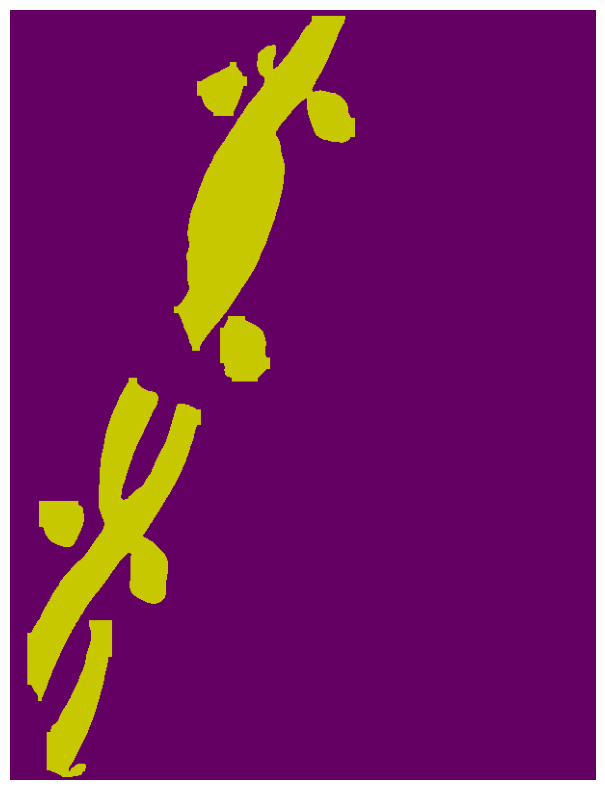

In [42]:
import matplotlib.pyplot as plt

masks = get_yolo_masks(
    weights_path="/content/drive/MyDrive/Repair Project/report/results/training/14c/train_250_800_16/weights/best.pt",
    image_path="/content/drive/MyDrive/Repair Project/report/data/14c/test/images/RPf_00481.png"
    )

plot_masks(masks)

In [7]:
# Training over Best Found Hyper-parameters
from ultralytics import YOLO
import torch
torch.cuda.empty_cache()

model = YOLO("yolov8l-seg.pt")
data_path = "/content/drive/MyDrive/Repair Project/report/data/7c"
result_path = "/content/drive/MyDrive/Repair Project/report/results/training/7c"

model.train(
    data= data_path + "/data.yaml",
    project=result_path,
    imgsz=800,
    epochs=250,
    batch=16,
    name="train_250_800_16",
    device="cuda",
    augment=True,
    cache=False,
    save=True,
    save_period=100,
    lr0 = 0.01,
    momentum= 0.937,
    weight_decay= 0.0005,
    hsv_h= 0.015,
    hsv_s= 0.7,
    hsv_v= 0.4,
    scale= 0.5,
    box= 7.5,
    verbose=True,
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Repair Project/report/data/7c/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_250_800_162, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

train: Scanning /content/drive/MyDrive/Repair Project/report/data/7c/train/labels... 324 images, 65 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:48<00:00,  6.62it/s]


train: New cache created: /content/drive/MyDrive/Repair Project/report/data/7c/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 0.1±0.1 MB/s, size: 109.8 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/7c/val/labels... 40 images, 7 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:08<00:00,  4.60it/s]

val: New cache created: /content/drive/MyDrive/Repair Project/report/data/7c/val/labels.cache


Plotting labels to /content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_162/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_162
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      15.6G      1.113      2.045      3.547      1.371         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         40         96      0.659      0.339      0.368      0.254      0.735      0.381      0.372      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250        16G     0.9499      1.242      2.051      1.212         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         40         96      0.648      0.322      0.233      0.149      0.632      0.294       0.21      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      16.2G      1.129       1.44      1.968      1.317         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40         96      0.205      0.157     0.0319     0.0175      0.193     0.0943     0.0177    0.00765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250      16.1G      1.127      1.403       1.83      1.322         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         40         96     0.0257      0.456     0.0403     0.0162     0.0638      0.205      0.042     0.0211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250        16G      1.175      1.444      1.696       1.32         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         40         96      0.085      0.571     0.0752     0.0619     0.0849      0.575     0.0725     0.0507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      16.1G      1.094      1.364      1.627      1.283         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         40         96      0.224      0.221      0.101     0.0593      0.207      0.233     0.0761     0.0429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      16.2G      1.129      1.455      1.595      1.337          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40         96      0.198      0.535      0.285      0.135      0.206      0.559      0.304      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      16.1G      1.114      1.368      1.507      1.279         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40         96      0.279      0.606      0.407      0.261      0.278      0.614      0.414      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.9G      1.028      1.299      1.374      1.245          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         96      0.768      0.459      0.535      0.339      0.745       0.44      0.516      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      16.2G      1.053      1.277      1.377      1.264         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         96      0.637      0.383      0.396      0.219      0.327      0.545      0.435      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      16.1G     0.9857      1.176      1.322      1.234         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.682      0.428      0.468      0.302      0.702      0.436      0.472      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      16.2G      1.015      1.243       1.33      1.228         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         96      0.422      0.731      0.543      0.341      0.417      0.713      0.524       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250        16G      1.025      1.246      1.317      1.265         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         96      0.449      0.677      0.537       0.35      0.761      0.416      0.495      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      16.2G      0.985      1.264      1.226      1.237         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.769      0.334      0.357      0.231      0.612      0.344      0.363      0.224



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      16.1G     0.9833      1.208      1.202      1.209         39        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.559      0.471      0.468       0.33      0.579      0.463      0.462      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      16.1G     0.9527      1.166      1.198       1.21         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.72      0.354      0.454      0.306      0.747      0.364      0.499      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250        16G     0.9874      1.128      1.192      1.211         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         96      0.674      0.462      0.544      0.378      0.391      0.698      0.606      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      16.1G     0.9343      1.116      1.145        1.2         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.696      0.449      0.505      0.353      0.699      0.453      0.501      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      16.2G     0.8994      1.085      1.086      1.157         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40         96      0.647      0.362      0.405      0.252      0.703      0.314      0.381      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      16.2G     0.9055      1.141      1.091      1.143         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         96       0.59      0.593      0.451      0.312      0.589      0.593      0.473      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      16.5G      0.954      1.161      1.138      1.223         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96        0.7      0.665      0.648      0.411      0.687      0.624      0.624      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250      16.1G     0.9131      1.131      1.054      1.191         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40         96      0.468      0.659      0.645      0.466      0.495      0.694      0.685       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      16.1G     0.8946      1.102      1.044      1.184         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.756      0.556      0.624      0.407      0.767      0.551      0.609      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250        16G     0.9257      1.133       1.05      1.194         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.78      0.757      0.805      0.604       0.76      0.751      0.789      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250        16G     0.8547      1.099       1.08      1.139         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.76      0.548      0.609      0.424      0.759      0.566      0.614      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250      16.1G     0.8537      1.046     0.9871      1.158         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.817       0.48      0.573      0.385      0.805      0.473      0.585      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      16.2G     0.8954      1.067      1.038      1.168         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.667      0.579       0.56      0.352      0.679        0.6      0.589      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      16.1G     0.9265      1.136      1.246      1.193          2        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40         96      0.708      0.631      0.651       0.45      0.708      0.631      0.659      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250        16G     0.8501      1.049      0.972      1.154         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96        0.8      0.568      0.667      0.484      0.817       0.59      0.702      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      16.2G     0.8873      1.066      1.058      1.186         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         40         96      0.641      0.383      0.402      0.279      0.343      0.456      0.337       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      16.2G     0.8206       1.03     0.9664      1.114         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.722      0.368      0.396      0.283      0.648      0.369      0.373      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      16.1G      0.798       1.09     0.9798      1.103         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.704      0.561      0.614      0.433      0.737      0.514       0.63      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250        16G     0.7838      1.022     0.9351      1.113         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.794       0.57      0.638      0.449      0.785      0.556      0.652      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250      16.1G      0.821      1.088     0.9938      1.136         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.809      0.464      0.577      0.412      0.809      0.476      0.582      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250      16.1G     0.8015      1.029     0.9246      1.119         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.701      0.502      0.498      0.339      0.717      0.513      0.537      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      16.2G     0.8052      1.017     0.9389      1.125         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.701       0.47      0.443      0.297      0.674      0.448      0.406      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      15.9G     0.8054      1.037     0.9113      1.123         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.742      0.764      0.736      0.563       0.73      0.761      0.728      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250        16G     0.7868      1.005     0.8362      1.098         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.608      0.711       0.75       0.54      0.611      0.707      0.754      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      16.2G     0.7525     0.9912     0.8356      1.102         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.67      0.607      0.606      0.438      0.702      0.631      0.632      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250      16.1G     0.7626     0.9889     0.8485      1.074         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.545       0.57      0.527      0.343      0.541      0.558      0.504      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250        16G     0.7438     0.9855     0.7873      1.084         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96       0.82      0.626      0.656      0.477      0.807      0.619      0.654      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      16.1G     0.7498     0.9277     0.8194      1.075         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.713      0.499      0.561      0.382       0.66      0.468      0.525      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250        16G     0.7446      1.021     0.7878      1.093         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.589      0.461      0.485      0.334      0.572      0.458      0.477      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250        16G     0.7275     0.9575     0.7624       1.08         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40         96      0.377      0.549      0.435      0.303      0.354      0.506      0.399       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250      15.9G     0.7029      0.872     0.7432      1.064         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.619      0.727      0.702      0.537      0.628      0.739      0.716      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      16.2G     0.7524     0.9758     0.7825      1.085         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.59      0.684      0.658      0.486      0.606      0.703      0.687      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250      16.1G     0.7071      0.943     0.7856       1.06         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.678      0.599      0.661      0.477      0.687      0.606      0.679       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      16.1G     0.7631     0.9501     0.7834      1.087         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.81      0.662      0.708      0.519      0.818      0.675      0.733       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250        16G     0.7299     0.9447     0.7614      1.074         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.848      0.587      0.671      0.466       0.86      0.598      0.678      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      16.1G     0.7288     0.9034     0.7028      1.056         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40         96      0.567      0.406      0.385      0.255      0.397      0.416      0.327      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      16.1G     0.6765     0.8978     0.6763      1.047         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.85      0.592      0.672      0.468      0.855      0.602      0.668      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      16.1G     0.6968     0.9454     0.6992      1.071         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.648      0.593      0.711       0.52      0.664        0.6      0.723      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250      16.1G     0.6875     0.9077     0.7044       1.04         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.573      0.746      0.665      0.482      0.592      0.759      0.675        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      16.2G     0.7025     0.9272     0.7256      1.054          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.846      0.449      0.548      0.416       0.83      0.468      0.564      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250      16.1G      0.677      0.908     0.7179      1.039         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.823      0.698      0.758      0.592      0.841      0.717      0.775      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      16.2G      0.723     0.9694     0.7593      1.088         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.827        0.6      0.685      0.519      0.833      0.609      0.698      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250        16G     0.6804     0.9293     0.7096      1.034         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.585       0.76      0.692      0.529      0.595      0.767      0.706      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      16.1G     0.6883     0.9232     0.7256       1.03         41        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.59       0.65      0.692      0.529      0.605      0.669       0.72      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250        16G     0.6683     0.9191      0.735      1.044         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.662       0.72      0.707      0.532      0.675      0.739      0.728      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250      16.1G     0.6692     0.8808     0.6905       1.03         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.665        0.8      0.799      0.565      0.906      0.667      0.721       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.9G     0.6812     0.9071     0.6667      1.039         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.754      0.758      0.766      0.599      0.767      0.774      0.787      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      16.1G     0.6425     0.8399     0.6465       1.03         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.513      0.614      0.622      0.419      0.513       0.61      0.626      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250        16G     0.6777     0.8978     0.7004      1.061         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.678      0.757       0.76      0.595       0.68      0.757      0.746      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      16.2G     0.6545     0.8659     0.6797      1.033         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.716      0.697      0.756      0.563      0.641      0.859      0.782      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250      16.1G     0.6613     0.8858     0.7416      1.041         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.529      0.714      0.724      0.565      0.516      0.699       0.74      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      16.1G     0.6606     0.9182     0.6331      1.036         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.706      0.592      0.631      0.493       0.77      0.631      0.674       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250        16G     0.6686     0.8534     0.6912      1.038         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.59      0.715      0.689       0.53       0.59      0.715      0.697      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      16.1G     0.6549     0.9243     0.6602       1.04         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.879      0.652      0.742      0.574      0.867      0.648       0.73      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      15.9G     0.6605      0.898     0.6529      1.028          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.774      0.684      0.791      0.608      0.784      0.692      0.817       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      16.2G     0.6292     0.8606     0.6235      1.013         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.703      0.713       0.71      0.548      0.689      0.706      0.696      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      16.1G     0.6345     0.8278     0.6185      1.028         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.616        0.8      0.722      0.547      0.626       0.81      0.734      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      16.1G     0.6304     0.8374     0.5974     0.9937         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.725      0.754       0.82      0.649      0.728      0.758      0.829      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.9G     0.6308     0.8577     0.5862       1.01         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.819      0.793      0.857      0.677      0.826        0.8      0.865      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      16.1G     0.6069     0.8122     0.5838          1         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.594      0.879      0.806      0.542      0.625      0.763      0.749      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      16.1G     0.6327      0.844     0.6092      1.006         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.736      0.781      0.832      0.617      0.718      0.763      0.813      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      16.1G     0.6287     0.8764     0.5999      1.007         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.693      0.582      0.653      0.521      0.697      0.595      0.669      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      15.9G     0.5906     0.8059     0.5751      1.002         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.869      0.671      0.697      0.537      0.851      0.653      0.693      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      16.1G     0.5984     0.7986     0.5827      1.003         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.87      0.673      0.741      0.562      0.869       0.69      0.756      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250        16G     0.6152     0.8538     0.6086     0.9992          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.84       0.64      0.783      0.603      0.623      0.789      0.775      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250      16.1G     0.5961     0.8386     0.5562      0.979         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.67      0.631      0.704      0.534      0.678      0.641      0.719      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250      15.9G     0.5939     0.7867     0.5332     0.9909         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.732       0.73       0.76      0.597      0.665      0.825      0.756       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      16.1G     0.6173     0.8136     0.5677      1.007         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.643      0.818       0.82      0.641      0.664      0.845      0.841      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      16.2G     0.6066     0.8022     0.5237     0.9778         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96       0.83      0.722      0.845      0.643      0.841      0.738      0.864      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      16.1G     0.5784     0.8117     0.5459     0.9871         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.836      0.683      0.713      0.531       0.86      0.714      0.743      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250      16.1G      0.575     0.7939     0.5298     0.9709         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.792      0.634      0.674      0.518      0.815      0.657      0.708      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      16.2G     0.6222     0.8597     0.6249      1.011         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.809      0.539      0.639      0.507      0.772       0.59      0.652      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      16.2G     0.5898      0.801     0.5621      0.996         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         96      0.543      0.713      0.633      0.461      0.894      0.483      0.632      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250        16G     0.6008     0.7899     0.5812      1.022          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.89      0.694      0.743      0.593        0.9      0.701      0.759      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      16.5G     0.5941     0.7887      0.572     0.9959         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.685      0.846      0.824      0.607      0.702      0.864      0.845      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250      16.1G     0.5742     0.7912     0.5497     0.9752         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.845      0.703      0.781      0.596      0.853       0.71      0.792      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      16.1G     0.5489     0.7491     0.5122     0.9727         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.698      0.776      0.758       0.55      0.678      0.762      0.747      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      16.1G     0.5669     0.7731     0.4993     0.9858         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.795      0.743      0.781      0.587      0.775      0.813      0.818      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250      16.1G     0.5744      0.764     0.5182     0.9875         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.848      0.835      0.878      0.606      0.864      0.847      0.901      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250      16.1G      0.605     0.7787     0.5266      1.009         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.739      0.819      0.861      0.678       0.76      0.842      0.887      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      16.1G     0.5876     0.7809     0.5273      1.005         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.699      0.809      0.755      0.578      0.695      0.804      0.744      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      16.1G     0.5528     0.7684     0.5143     0.9698         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.664      0.794      0.775      0.604      0.691      0.823      0.809      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250        16G     0.5728     0.7868     0.5479     0.9701         40        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.811      0.835      0.882      0.705      0.818      0.841      0.901       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250      16.1G     0.5827     0.7899     0.5448     0.9824         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.872        0.7      0.874        0.7      0.877      0.704      0.891      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250      16.1G     0.5688     0.7685     0.5392     0.9921         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.864      0.692      0.809      0.641      0.864      0.692      0.809      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      16.1G     0.5925     0.8259     0.5495      0.996          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.703      0.662      0.693      0.469      0.671      0.633      0.661      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250        16G     0.5739     0.7648     0.5212     0.9905         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.738      0.762      0.737      0.553      0.742      0.766      0.739      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      16.1G     0.5422     0.7747     0.5202     0.9696         38        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.845      0.673      0.777      0.585      0.828      0.658      0.763      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250      16.1G     0.5434     0.7595     0.4854     0.9532         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.738      0.746      0.815      0.634      0.722      0.732      0.813      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250      15.9G     0.5396     0.8094     0.4932     0.9769         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.856      0.651      0.797      0.627      0.864      0.662      0.813       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      15.9G     0.5374     0.7286     0.4727     0.9617         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.765      0.727      0.764      0.595       0.78      0.742      0.782      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250      16.1G     0.5476     0.7656     0.5034     0.9767          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.661      0.752      0.773      0.594      0.671      0.763      0.798      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      16.1G     0.5687     0.7634     0.5149      1.008         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.612       0.74      0.685      0.484      0.597      0.718      0.656      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      16.2G     0.5515     0.7692     0.5232     0.9794         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.784      0.729      0.803      0.623      0.809      0.751      0.828      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      15.9G     0.5592      0.752     0.5037     0.9848         43        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.677        0.7       0.68      0.507      0.664      0.689       0.68      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      16.1G     0.5298     0.7474     0.4874     0.9669         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.69      0.843      0.823      0.566      0.688      0.843      0.811      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      16.1G     0.5254     0.7649     0.4904     0.9603         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.679      0.852      0.847      0.637      0.671      0.829      0.841      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      16.1G     0.5162     0.7092     0.5047     0.9625         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.792      0.652      0.761      0.584      0.806      0.672      0.781      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250        16G     0.5319     0.7537      0.496     0.9762         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.767      0.718      0.772      0.624      0.774      0.725      0.778      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      16.1G     0.5159     0.7429     0.4726     0.9505          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.786      0.763      0.825      0.651      0.775      0.749      0.813      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      16.1G     0.5094     0.7007     0.4844     0.9517         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.75      0.893      0.897      0.722      0.752      0.906      0.917      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      16.1G     0.5167      0.744     0.4689     0.9493         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.616      0.674      0.689      0.523      0.742      0.542      0.692      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      15.9G     0.5061     0.7435     0.4955     0.9579         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.819      0.844      0.885       0.72      0.831      0.855      0.904      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      16.1G     0.5234     0.7646     0.5188     0.9694          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.694      0.729      0.719      0.548      0.698      0.733      0.732      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250        16G     0.5064     0.7152     0.5389     0.9559         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.849      0.526      0.643      0.465      0.872      0.543      0.656      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250      16.2G     0.5201     0.7191     0.4743     0.9654         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.848       0.68      0.811      0.666      0.856      0.687      0.836      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      15.9G     0.4958     0.7007     0.4837     0.9271         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.829       0.73      0.779      0.637      0.848      0.755      0.815      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      16.2G       0.51     0.7144      0.488     0.9582         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.821      0.629      0.679      0.509      0.849      0.576      0.662      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      16.2G     0.4742     0.6884     0.4238     0.9376         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.677      0.743      0.752      0.616      0.684      0.751      0.771      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      16.1G      0.488     0.6795     0.4422     0.9308         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.868      0.728      0.797      0.647      0.878      0.735      0.817      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250        16G     0.5113     0.7179     0.4428     0.9443         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96       0.71      0.782      0.827      0.652      0.721      0.793      0.846      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      16.1G     0.5016     0.7454     0.4582     0.9553         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.88      0.709      0.838      0.669      0.889      0.716      0.855      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      16.1G     0.5072     0.7243     0.4487     0.9405         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.87      0.708      0.829      0.644      0.882      0.723      0.855       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      16.3G     0.5014     0.7399     0.4679     0.9454         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.711      0.891      0.836      0.633      0.734      0.922      0.861      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      15.9G     0.5101     0.7182      0.492     0.9387         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.764      0.737      0.785      0.557      0.777      0.748      0.804      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      16.1G     0.5208     0.6814     0.4742      0.968         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.72      0.851      0.839      0.645      0.712      0.871      0.848      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250        16G     0.4973     0.7391     0.4671     0.9583          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.852      0.455      0.543      0.372      0.844      0.444      0.537      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250      16.1G     0.4741        0.7     0.4403     0.9239          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.87      0.731      0.848      0.682      0.873      0.734      0.856      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250        16G     0.4628     0.6367     0.4194       0.94          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.781      0.757      0.792      0.646      0.788      0.764      0.802      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      16.2G     0.4806     0.7105     0.4357      0.952         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.667      0.732      0.752      0.578      0.665       0.73      0.722       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250      16.1G     0.4883     0.6894     0.4664     0.9548         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.748      0.808      0.815      0.625      0.747       0.83      0.817      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250      16.1G     0.4765     0.6901     0.4586     0.9403         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.818      0.853      0.867      0.705       0.81      0.845      0.856      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250        16G     0.4654     0.6829     0.4325     0.9269         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.863      0.661      0.785      0.637      0.882      0.676      0.806      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      16.1G     0.4628     0.6573     0.4389     0.9261         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.682      0.736      0.785      0.646      0.696      0.749      0.808       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      16.2G     0.4598     0.6562     0.4037     0.9187         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.858      0.649      0.869      0.713      0.876      0.664      0.888      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250      16.1G     0.4765      0.698     0.4457     0.9372         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.66      0.817      0.764      0.618      0.674      0.832       0.78      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      15.9G     0.4648     0.7061     0.4318     0.9316         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.697      0.868      0.842      0.697      0.709      0.879      0.858      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250      16.1G     0.4743      0.697      0.457     0.9328         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40         96      0.836      0.806      0.872      0.716      0.845      0.813       0.88       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250      16.1G     0.4726     0.6822     0.4676     0.9395         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.814      0.835      0.858      0.704      0.831       0.85      0.876       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250      16.1G     0.4741     0.6557     0.4371     0.9358         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.819      0.806      0.861      0.681      0.826      0.813      0.864      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250        16G     0.4426     0.6651     0.3997     0.9092          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.791      0.835      0.873       0.69      0.798      0.841      0.884      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      16.1G     0.4866     0.6996     0.4523     0.9374          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.862      0.762      0.877      0.667      0.871      0.769      0.888      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      16.1G     0.4777      0.694     0.4375     0.9393         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.823      0.763      0.823       0.64       0.83      0.771      0.838      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250      16.1G     0.4433     0.6429     0.4007     0.9197         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.663      0.758      0.747      0.551      0.669      0.765      0.779      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250        16G     0.4498     0.6504     0.4149     0.9305         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.863      0.802      0.852      0.653      0.904      0.784      0.871      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      16.1G     0.4446     0.6396     0.3765     0.9222         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.826      0.768       0.87      0.707      0.838      0.779      0.891      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250        16G     0.4433     0.6633     0.4141     0.9194         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.766      0.867      0.875      0.685      0.777      0.878       0.89      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      16.1G     0.4363     0.6784     0.3947      0.921         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.867      0.819      0.888      0.714      0.875      0.827      0.908      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250      16.1G     0.4336     0.6561     0.3965     0.9258          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.755      0.828       0.82      0.643        0.8      0.875      0.876      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      16.1G     0.4313     0.6773     0.3926     0.9192         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.727      0.762      0.791      0.623      0.735      0.769      0.788      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      16.1G     0.4564     0.6439     0.4027     0.9269         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.663        0.8       0.82      0.563      0.654      0.785      0.803      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      16.1G     0.4515     0.6694      0.411     0.9362         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96        0.7      0.827       0.77      0.588      0.703      0.831      0.776      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      16.5G     0.4682     0.6591     0.4447     0.9331         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.793      0.848      0.859      0.673      0.808      0.862      0.884      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      16.1G     0.4368     0.6326     0.4138     0.9164         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.81      0.807       0.85       0.69      0.853      0.802      0.866      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      16.1G     0.4107     0.6288     0.3777     0.9094         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.818      0.773      0.863      0.693      0.829      0.793      0.874      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      16.3G     0.4148     0.6042     0.3911     0.9087         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.733      0.803      0.838      0.671      0.787      0.787      0.854       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      15.9G     0.4215     0.6501     0.3848     0.9214         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.726      0.871      0.862      0.695      0.731      0.869      0.846       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250      16.1G     0.4424     0.6153     0.3871     0.9183          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.784      0.875      0.888       0.71      0.779      0.869      0.878      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      16.2G      0.419     0.5789      0.394     0.9075         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96       0.79      0.796      0.845       0.67      0.801      0.807      0.856      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      16.2G     0.4048     0.5984      0.349     0.9092         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.747      0.862      0.842      0.661      0.771      0.884      0.869       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250      16.1G     0.4294     0.6107     0.3763     0.9128         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         96      0.704      0.782      0.795      0.614      0.704      0.778      0.792      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      16.1G     0.4309     0.6467     0.4098     0.9306         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.756      0.871      0.833      0.681      0.776      0.892      0.865      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      16.1G     0.4108      0.637     0.3924      0.905         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40         96      0.747       0.68      0.726      0.588      0.735      0.722      0.756       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      16.1G     0.4081     0.6416     0.3709     0.9037         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.846      0.714      0.779      0.617       0.87      0.733      0.816      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      16.4G     0.3999     0.6297     0.3634     0.9066         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.722      0.761      0.762      0.573      0.683      0.743      0.701      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      16.2G      0.403     0.6052     0.3786     0.9079         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.798      0.577        0.6      0.433      0.714      0.515      0.511      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250      16.1G     0.4097     0.6114     0.3848     0.9065         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.856      0.718      0.797      0.635      0.865      0.725       0.82      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      16.1G     0.4127     0.6106     0.3704     0.9149         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.802       0.81      0.845      0.685      0.832      0.811      0.876      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250        16G     0.3989     0.5909     0.3627     0.9084         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.818      0.825      0.857        0.7      0.844      0.844      0.885      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250      16.1G     0.4072      0.604     0.4015     0.9161          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.807      0.714      0.803      0.631       0.83      0.736      0.846      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250      16.1G     0.4084     0.6259     0.3558     0.9168         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.824      0.755      0.823      0.666      0.844      0.774      0.861       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      16.2G     0.3897     0.5869     0.3713     0.9038          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.856       0.84      0.882      0.703      0.869      0.851      0.907      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250      16.1G     0.3981     0.5933     0.3557     0.8997         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.866      0.837      0.893      0.719      0.864      0.834      0.895      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      16.2G     0.4045     0.6376     0.3752     0.9141         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.863      0.832      0.898      0.717      0.887      0.839      0.919      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250      16.1G     0.3923     0.5898     0.3627     0.9073         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.825      0.823      0.886      0.735      0.889      0.807      0.901      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      16.1G     0.3996     0.5714     0.3561     0.9154         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         96      0.791      0.851      0.875      0.717      0.809       0.87      0.904      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250        16G     0.3973     0.5899     0.3368     0.9063         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.825      0.787      0.875      0.712      0.841      0.802       0.89      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      16.1G     0.3957     0.5891      0.335     0.9068         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96      0.844      0.833      0.888      0.716      0.837      0.825      0.861      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      16.2G     0.3786     0.5647     0.3357      0.896         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.881      0.824      0.896      0.726      0.899      0.839      0.915      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250        16G     0.3844     0.5845      0.351     0.8939         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         40         96      0.846      0.736      0.863      0.697      0.859      0.748      0.867      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      15.9G     0.3838      0.563     0.3419     0.9016         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.822      0.839      0.879      0.684      0.834      0.849      0.883      0.689



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250      16.1G     0.3763     0.5715     0.3521     0.8998         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.831      0.825      0.865      0.698      0.848       0.84      0.884      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      16.1G     0.3631     0.5284     0.3121      0.893         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.871      0.842      0.885      0.713      0.883      0.853      0.903      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250      16.1G     0.3667     0.5246     0.3212     0.8958         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.874      0.857      0.895      0.723      0.886      0.868      0.914      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      15.9G     0.3652     0.5666     0.3331      0.898         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.861      0.847      0.882      0.713      0.878      0.861      0.899      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      16.1G     0.3617     0.5618     0.3289     0.8832         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.803      0.852      0.868      0.706       0.82      0.866      0.892      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      16.1G     0.3799     0.5906     0.3352     0.8948         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         96      0.776      0.713      0.782       0.64      0.792      0.728       0.81      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250      16.1G     0.3717     0.5486     0.3207     0.8884         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.77      0.721      0.757      0.603       0.79      0.739      0.786      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250        16G     0.3659     0.5623     0.3262     0.8973         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.707      0.746      0.769      0.633      0.721      0.761      0.787      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      16.2G     0.3576     0.5352     0.3166     0.8899          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96        0.8      0.831      0.852      0.706      0.811      0.842      0.866      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250      16.1G     0.3817     0.5862     0.3426     0.9054         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         96      0.834      0.754       0.82      0.654       0.85      0.769      0.845      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      16.1G     0.3737     0.5768     0.3514     0.8957         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.745      0.842      0.832      0.685      0.752      0.849      0.838      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      15.9G     0.3704     0.5886     0.3606     0.9038         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96       0.88      0.859      0.887      0.722      0.892       0.87      0.902      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250      16.1G     0.3644     0.5432     0.3418     0.9049         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.838      0.863      0.884      0.717       0.85      0.874      0.897      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      16.1G     0.3623     0.5644     0.3161     0.8934         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.786      0.826      0.863       0.71      0.791      0.794       0.84      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250      16.1G     0.3623     0.5785     0.3215     0.8937         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96       0.83       0.82       0.83      0.678      0.844      0.832      0.849       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250        16G     0.3527     0.5453     0.3653     0.8819         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.79      0.826      0.847      0.696      0.802      0.837      0.865      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250      16.1G     0.3508     0.5426     0.3023     0.8921         36        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.858      0.785      0.864      0.691      0.892       0.79      0.882       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250      16.1G     0.3383     0.5246     0.3054     0.8831         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.843      0.843      0.885      0.688      0.852      0.851      0.897       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250      16.1G     0.3454     0.5433     0.3097     0.8828         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.856      0.844        0.9      0.718      0.834      0.825      0.871      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      15.9G     0.3403     0.5253     0.3201      0.881         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.813      0.868      0.876      0.709      0.813      0.868      0.883      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250      16.1G     0.3387     0.5551     0.3153     0.8917         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.86      0.759      0.864      0.689       0.86      0.759      0.874      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250        16G     0.3421     0.5398     0.2952     0.8911         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.836      0.774      0.884      0.692      0.841      0.777       0.89      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      16.2G       0.34     0.5394     0.2992     0.8812         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.849      0.775      0.877      0.711      0.867      0.789      0.901      0.717



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.9G     0.3237     0.5329     0.2925     0.8865         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.791      0.833      0.859      0.697      0.795      0.836       0.86      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      16.1G     0.3478     0.5508     0.3142     0.8846         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96       0.76       0.87      0.852      0.707      0.767      0.877      0.864       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      16.2G     0.3344     0.5321        0.3     0.8877         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.903      0.786      0.882      0.731      0.909      0.792      0.884      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250        16G     0.3262     0.5275     0.2947     0.8671         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.923      0.789      0.894      0.743      0.933      0.795      0.901      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.9G     0.3299     0.5315      0.289     0.8767         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.903      0.825      0.905       0.75      0.912      0.833      0.912      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      16.1G     0.3322     0.5353     0.2881     0.8876         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         96      0.903      0.839      0.915      0.744      0.911      0.846      0.921      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      16.2G      0.319     0.5136     0.2731     0.8621         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.877      0.792      0.873      0.715      0.895      0.806      0.896      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250        16G     0.3231     0.5094     0.2846     0.8832         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.829       0.77      0.838       0.69      0.824      0.766      0.836      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.9G      0.314        0.5     0.2983     0.8794         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96       0.84       0.78      0.847      0.707      0.838       0.78      0.861       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250        16G     0.3135     0.5123     0.2916     0.8784          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.794      0.783      0.828      0.694      0.812      0.798      0.861      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250      16.1G     0.2964     0.4801     0.2576     0.8587         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.876      0.736      0.862      0.729      0.895      0.751      0.897      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250      16.1G     0.3237     0.5285      0.297      0.864         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.872      0.781      0.866      0.731       0.89      0.795      0.899       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      16.1G     0.3182     0.5087     0.2776     0.8816         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.855      0.774      0.866      0.725      0.873      0.789      0.904      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      16.1G     0.3112     0.5061     0.2817     0.8713         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.828      0.787      0.869      0.727      0.845      0.802      0.908      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      16.1G     0.3314      0.527      0.283     0.8767         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.884      0.817      0.882      0.729      0.901      0.832      0.917      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      16.1G     0.3102     0.5204       0.27     0.8763         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.867       0.82      0.873      0.728      0.885      0.835      0.909      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      16.5G     0.3072     0.5117     0.2739     0.8723         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96       0.83      0.729      0.822      0.687      0.848      0.744      0.857      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      16.1G     0.3218     0.5103     0.2895     0.8871         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.834      0.787      0.835      0.682      0.847      0.798      0.864      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      16.1G     0.3106      0.492     0.2706     0.8773         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.806      0.854      0.868       0.72      0.809      0.859      0.882      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250      16.1G     0.3029     0.4957     0.2654     0.8737         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.823      0.799      0.877      0.728      0.827      0.802      0.887      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      15.9G     0.3064     0.5052     0.2644      0.863         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.853      0.794      0.859      0.724      0.865      0.803      0.885      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      16.1G     0.3081     0.5152     0.2837     0.8772         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         96      0.884      0.791      0.861      0.722      0.905       0.81      0.892      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250      16.1G     0.2975      0.496     0.2601      0.866         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.886      0.803      0.876      0.724      0.898      0.814      0.896      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      16.2G     0.2899     0.4905     0.2691     0.8666         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.883      0.799      0.878      0.725      0.896      0.809      0.902      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250        16G     0.3143     0.5214     0.3003     0.8762         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.868      0.787      0.869       0.73       0.89      0.806        0.9      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      16.2G      0.294     0.5047     0.2731     0.8664         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.876      0.786      0.869      0.728      0.898      0.804      0.894      0.704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      16.1G     0.3041     0.5223     0.2771     0.8612         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.842      0.784       0.88      0.732      0.859      0.799      0.906      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250        16G     0.3023     0.4945     0.2678     0.8776          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.751      0.865      0.853      0.702      0.763      0.876      0.874      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.9G     0.2934     0.4828     0.2581     0.8662         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.865      0.792      0.875      0.716      0.878      0.803      0.896      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      16.2G     0.2942     0.4933      0.259     0.8746         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.872      0.793      0.858      0.702      0.885      0.804       0.88      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250      16.1G     0.2947     0.4973     0.2474     0.8751         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         96      0.884      0.786      0.859      0.714      0.898      0.797      0.883      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      16.2G     0.2957     0.4968     0.2576     0.8693         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.876      0.788      0.874       0.73       0.89      0.799      0.894      0.712


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      15.9G     0.2336     0.4209     0.2264     0.8462          6        800: 100%|██████████| 21/21 [00:20<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         96      0.864      0.791      0.883       0.73      0.877      0.803      0.905      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250      16.1G      0.239     0.4154     0.2187     0.8535          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         96      0.873      0.793      0.881      0.736      0.886      0.804      0.902      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250        16G     0.2136     0.4101     0.1845     0.8279          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.877      0.789      0.879      0.728       0.89      0.801      0.902      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250        16G     0.2357     0.4114     0.1979     0.8481          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         96       0.87      0.789      0.877      0.732      0.883        0.8      0.899      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      15.9G     0.2198     0.4089     0.2008     0.8202          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.868      0.791      0.878      0.731      0.881      0.802      0.899      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250        16G      0.236     0.4087     0.2079     0.8478          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         96      0.863      0.789      0.879      0.732      0.876        0.8      0.899      0.719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250        16G     0.2252     0.4125     0.2106     0.8319         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.868      0.794      0.881      0.735      0.881      0.805      0.902      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      16.1G     0.2161      0.408     0.1997     0.8314          2        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         96      0.874      0.796      0.873      0.731      0.887      0.807      0.892      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      16.4G      0.214     0.3984     0.1867      0.833          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         96      0.876      0.793      0.869      0.731      0.889      0.805      0.888      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      16.1G     0.2171     0.4049     0.2006     0.8297         31        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         96      0.875      0.793      0.869      0.727      0.888      0.805      0.888      0.703



250 epochs completed in 1.535 hours.
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_162/weights/last.pt, 92.4MB
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_162/weights/best.pt, 92.4MB

Validating /content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_162/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,917,285 parameters, 0 gradients, 220.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.38it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         40         96      0.903      0.826      0.905      0.751      0.911      0.833      0.913      0.716
             blue_bird          2          2      0.987          1      0.995      0.947      0.988          1      0.995      0.895
           blue_flower          6          9      0.783      0.667      0.809      0.593      0.784      0.667      0.823      0.504
            red_spiral          8         45      0.829      0.753      0.813      0.614      0.878      0.797      0.842      0.578
   curved_green_stripe         14         14      0.982      0.857      0.969      0.768      0.982      0.857      0.969      0.836
       thin_red_stripe         17         22      0.881      0.677      0.851      0.715      0.881      0.676      0.851      0.695
      thick_red_stripe          4          4      0.953          1      0.995      0.868      0.953          1      0.995      0.786
Speed: 0.3ms preprocess, 17.6ms inference, 0.0ms loss, 1.5ms postproc

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f109a361dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004

In [8]:
evaluate_yolo_box_seg(
"/content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_16/weights/best.pt",
data_path+"/data.yaml")

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,917,285 parameters, 0 gradients, 220.2 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.3±0.3 MB/s, size: 351.0 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/7c/test/labels... 39 images, 10 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:09<00:00,  4.26it/s]

val: New cache created: /content/drive/MyDrive/Repair Project/report/data/7c/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]


                   all         39         62      0.824      0.858       0.92      0.795      0.824      0.858       0.92      0.792
Speed: 5.3ms preprocess, 27.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/val3


{'box_precision': 0.8241512399625393,
 'box_recall': 0.857753181853182,
 'box_map50': 0.9203596167916207,
 'seg_precision': 0.8241512399625393,
 'seg_recall': 0.857753181853182,
 'seg_map50': 0.9203596167916207}

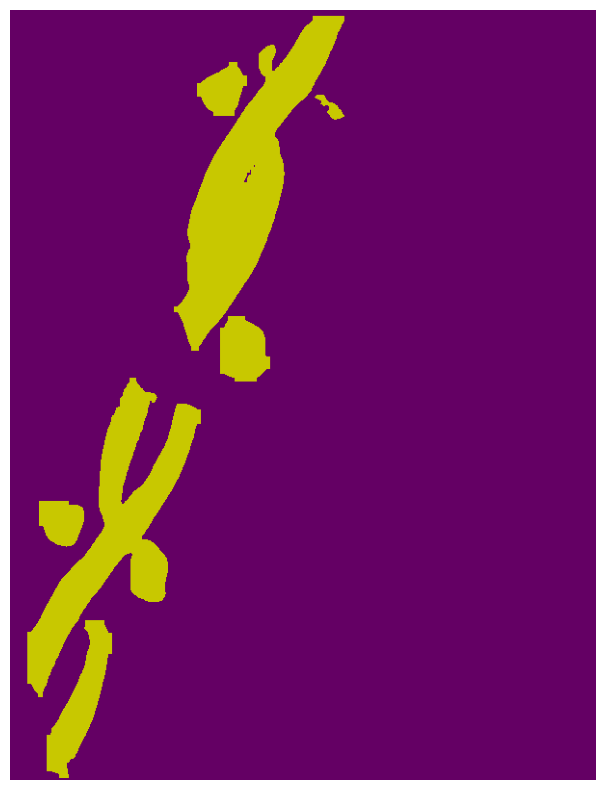

In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

masks = get_yolo_masks(
    weights_path="/content/drive/MyDrive/Repair Project/report/results/training/7c/train_250_800_16/weights/best.pt",
    image_path="/content/drive/MyDrive/Repair Project/report/data/7c/test/images/RPf_00481.png"
    )

plot_masks(masks)

In [11]:
# Training over Best Found Hyper-parameters
from ultralytics import YOLO
import torch
torch.cuda.empty_cache()

model = YOLO("yolov8l-seg.pt")
data_path = "/content/drive/MyDrive/Repair Project/report/data/3c"
result_path = "/content/drive/MyDrive/Repair Project/report/results/training/3c"

model.train(
    data= data_path + "/data.yaml",
    project=result_path,
    imgsz=800,
    epochs=250,
    batch=16,
    name="train_250_800_16",
    device="cuda",
    augment=True,
    cache=False,
    save=True,
    save_period=100,
    lr0 = 0.01,
    momentum= 0.937,
    weight_decay= 0.0005,
    hsv_h= 0.015,
    hsv_s= 0.7,
    hsv_v= 0.4,
    scale= 0.5,
    box= 7.5,
    verbose=True,
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Repair Project/report/data/3c/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_250_800_16, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, per

train: Scanning /content/drive/MyDrive/Repair Project/report/data/3c/train/labels... 324 images, 116 backgrounds, 0 corrupt: 100%|██████████| 324/324 [00:37<00:00,  8.59it/s]

train: New cache created: /content/drive/MyDrive/Repair Project/report/data/3c/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.1 ms, read: 0.1±0.1 MB/s, size: 109.8 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/3c/val/labels... 40 images, 12 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:09<00:00,  4.02it/s]

val: New cache created: /content/drive/MyDrive/Repair Project/report/data/3c/val/labels.cache


Plotting labels to /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/250      17.3G      1.174      1.982      3.774      1.355          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         40         81     0.0922       0.35     0.0828     0.0453     0.0992       0.38     0.0868     0.0465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/250      15.9G      1.122       1.39      2.427      1.281          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         40         81     0.0203      0.453     0.0405     0.0176     0.0152      0.384     0.0166    0.00863



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/250      16.1G      1.363      1.504      2.358      1.404         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]

                   all         40         81          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/250        16G      1.372      1.479       1.98      1.453         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40         81     0.0205      0.234     0.0172    0.00915     0.0169      0.112     0.0115    0.00677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/250      15.9G      1.392      1.604      1.867      1.449         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         40         81      0.176      0.181      0.115     0.0602      0.158      0.177      0.099     0.0406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/250      16.1G      1.364      1.527      1.866      1.413         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81    0.00729     0.0606    0.00315   0.000633   6.97e-05    0.00741   3.63e-05    1.8e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/250      16.1G      1.334      1.483      1.817       1.39          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         40         81       0.21      0.706      0.324       0.18      0.218      0.745      0.356      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/250      16.1G      1.282      1.435      1.671      1.336         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         40         81      0.233       0.24       0.14      0.074      0.279      0.225      0.124     0.0618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/250      15.9G      1.213      1.337      1.534      1.297          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.216      0.602      0.274      0.172      0.237      0.387      0.235      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/250      16.1G      1.214      1.347      1.509      1.296         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.308      0.378      0.303      0.193      0.315      0.368      0.317      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/250      16.1G      1.162      1.271      1.479      1.281         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.377      0.614       0.44      0.265      0.525      0.558      0.498      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/250      16.2G      1.202      1.332      1.459      1.286         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         40         81      0.446      0.492      0.487      0.232      0.453      0.499      0.473      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/250      15.9G      1.182       1.29      1.456      1.314         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         40         81      0.482      0.412      0.378      0.214       0.47      0.412      0.385      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/250      16.1G      1.184      1.349      1.507      1.296         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.494      0.523      0.446      0.242      0.446      0.501      0.409       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/250      16.1G      1.122      1.358      1.376      1.266         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81       0.37      0.689       0.47      0.302      0.396      0.681      0.507      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/250      16.1G       1.11      1.266      1.348      1.263         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.601      0.573      0.618      0.356      0.621      0.575      0.626      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/250      15.9G      1.116      1.239      1.345      1.247         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.548      0.614      0.561      0.344       0.56      0.625      0.617      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/250      16.1G      1.066      1.216      1.264      1.235         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.443       0.67       0.56      0.331      0.662      0.505      0.619      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/250      16.2G      1.028      1.208      1.214      1.174          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.567      0.598      0.616      0.364       0.59      0.635      0.619      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/250      16.1G      1.024      1.222      1.264      1.189         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         81      0.519      0.444      0.432      0.272      0.523      0.452      0.448      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/250      15.9G       1.04      1.236      1.282      1.217         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.692      0.542      0.562      0.348      0.726      0.532       0.55      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/250        16G      1.049      1.232      1.342      1.257          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.355      0.587      0.418      0.259      0.386      0.609      0.445      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/250      16.1G      0.988      1.166      1.177      1.209          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.519      0.473      0.489      0.303      0.499      0.448      0.415      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/250        16G      1.069      1.165      1.239      1.225         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.524      0.485      0.516      0.306      0.492      0.475      0.472      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/250      15.9G      1.035      1.261      1.275      1.217          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.429      0.492      0.428      0.284      0.416       0.46      0.417      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/250        16G     0.9423      1.125      1.128      1.166         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.681      0.592      0.643      0.435      0.613      0.738      0.725      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/250      16.1G     0.9632       1.12      1.106      1.178         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81       0.39      0.388      0.393      0.274      0.387      0.362      0.383      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/250      16.1G      1.015      1.198      1.322      1.208          2        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.639      0.606      0.684       0.44      0.622      0.695      0.701      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/250        16G     0.9958      1.115      1.185      1.206         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.524      0.607      0.568      0.369      0.558       0.57      0.583      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/250      16.1G          1       1.14      1.165      1.238          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.639      0.703      0.706      0.441      0.697      0.659      0.732      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/250      16.2G     0.9937      1.218      1.145      1.188         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.598      0.609      0.603      0.368       0.63      0.654      0.646      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/250      16.1G     0.9797      1.222      1.119      1.161         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.609      0.622      0.648      0.436      0.603       0.65      0.677      0.425



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/250      15.9G     0.9187      1.066      1.063      1.144          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.67      0.582      0.699      0.499        0.6      0.657      0.716      0.483



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/250        16G     0.9747      1.157      1.116      1.182         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81       0.59      0.775      0.712      0.482      0.622      0.774       0.74      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/250        16G     0.9553      1.123      1.111      1.182         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.609      0.705      0.681       0.46      0.665      0.755      0.744      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/250      16.1G      0.924      1.153      1.067      1.164         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.625      0.773      0.752      0.512       0.64      0.735       0.77      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/250      16.4G     0.9106      1.107      1.029      1.144         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.607       0.73      0.736      0.515      0.689      0.735      0.771       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/250        16G     0.9013      1.084      0.987      1.137          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.565       0.65      0.637      0.442      0.595      0.703      0.693      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/250      16.1G     0.9342      1.118      1.028        1.2          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40         81      0.734      0.749      0.762       0.52      0.734      0.749      0.765       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/250        16G     0.9056      1.095     0.9793      1.136         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.706      0.709       0.73      0.497      0.704      0.765      0.786      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/250      15.9G     0.8668      1.112     0.9606      1.132         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.647      0.685       0.69      0.456      0.672      0.717      0.717      0.461



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/250      16.1G     0.9018       1.07     0.9785      1.133         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.718      0.668      0.725      0.479      0.745      0.717      0.757      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/250      16.1G     0.8604      1.075     0.9561      1.136         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81       0.62      0.596      0.588      0.397      0.641      0.614      0.611      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/250      16.1G     0.8487      1.082     0.9157      1.124         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.804      0.617       0.72      0.488      0.851       0.62      0.735      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/250        16G     0.8339     0.9929     0.9055      1.099         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         81       0.68      0.668      0.688      0.489      0.727      0.723      0.739      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/250      16.1G     0.8513      1.074     0.8956      1.107         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.81      0.669      0.742      0.523      0.835      0.685      0.772      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/250        16G     0.8415       1.06     0.9281      1.088         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.583      0.711      0.647      0.423      0.633      0.734      0.697      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/250      16.1G     0.8526      1.044     0.8901      1.109         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.652      0.703      0.722      0.495      0.683       0.68      0.755      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/250        16G     0.8647      1.059     0.9534      1.129         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.634      0.672      0.671      0.469      0.692      0.734      0.729       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/250      16.1G     0.8615      1.021     0.8982        1.1         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.725      0.672      0.723      0.507      0.727      0.671       0.74       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/250      16.1G      0.849      1.012     0.8422      1.102         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.738       0.66       0.71      0.468      0.773      0.675      0.737      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/250      16.1G     0.8559      1.081     0.8999      1.115         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         40         81      0.685      0.623      0.737      0.497      0.807      0.613      0.774      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/250        16G     0.8208      1.042     0.8563      1.097         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.739      0.685      0.701      0.454      0.707      0.676      0.692      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/250      16.1G     0.7999      1.014     0.8593      1.085          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.811      0.653      0.738      0.529      0.844      0.626      0.768      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/250        16G     0.8255       1.04     0.8846      1.094         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.743      0.775      0.799      0.535       0.76       0.79      0.837      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/250      16.1G      0.803      1.036     0.9003      1.095          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.746      0.645      0.724      0.488        0.8      0.689      0.786      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/250      15.9G     0.7975     0.9986      0.823      1.081         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.652      0.734      0.713      0.515      0.663      0.741      0.722      0.517



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/250      16.1G     0.7747     0.9919     0.8268       1.06         37        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.721       0.72      0.755       0.51      0.731      0.735      0.777      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/250        16G     0.8006     0.9867     0.8912      1.094          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.684      0.736      0.704      0.473       0.73      0.759      0.761        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/250        16G      0.784     0.9759     0.8465      1.068         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.788      0.563      0.665       0.48      0.595      0.754      0.689      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/250      15.9G     0.7587      1.007     0.7733       1.07          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.811      0.687      0.731      0.524       0.82      0.714      0.786      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/250      16.1G     0.7318     0.9143     0.7307      1.048         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.695      0.673      0.708      0.496      0.735       0.71      0.726       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/250        16G     0.7934     0.9671     0.8497       1.09         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.691       0.74      0.733      0.533       0.71      0.756      0.756      0.504



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/250      16.1G      0.768     0.9412     0.8121       1.07         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.704      0.564      0.632       0.48      0.602      0.693      0.659      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/250        16G     0.7537     0.9747     0.8563      1.075          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.612      0.698      0.661      0.473      0.682      0.667      0.712      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/250      16.1G     0.7687     0.9667      0.761      1.091         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.764      0.752      0.786      0.576      0.792      0.762      0.816      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/250      15.9G     0.7569     0.9161     0.8021      1.052         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.634      0.677      0.685      0.498      0.684      0.713      0.768      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/250      16.1G     0.7413     0.9756      0.755      1.056         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.711        0.7      0.702      0.494      0.652      0.838      0.764      0.519



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/250      15.9G     0.7899     0.9368     0.7659      1.082          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.715      0.738      0.747      0.535      0.787      0.806      0.826      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/250      16.1G      0.742     0.9516     0.7595      1.055         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.799      0.744      0.802      0.568      0.769       0.79      0.822      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/250      16.1G     0.7438     0.9393     0.7228       1.05         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.739      0.721      0.742      0.521      0.754      0.735      0.787      0.541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/250      16.1G     0.7286     0.8982     0.6969      1.017         27        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81       0.68      0.812      0.725      0.527      0.714      0.878      0.802      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/250      15.9G     0.7215     0.8971     0.7234      1.034          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81       0.66      0.767      0.737      0.549       0.78      0.726      0.769      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/250      16.1G     0.6882     0.8776      0.685      1.021          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.674      0.773      0.777      0.576      0.706      0.789      0.803      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/250      16.1G     0.7133     0.9498     0.7221      1.022         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.647       0.79      0.751      0.541      0.653      0.765      0.764      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/250      16.1G     0.7563     0.9928     0.7184      1.053          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.732      0.861      0.805      0.565      0.774      0.876      0.852      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/250      16.4G     0.7155     0.8752     0.7271      1.051          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         81      0.732      0.751      0.755      0.541      0.758      0.795      0.797      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/250      16.2G     0.7477     0.8937     0.7027      1.055         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.422      0.563      0.488      0.332      0.402      0.483      0.423       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/250      16.1G     0.7384     0.9354     0.7466      1.038          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.788       0.72      0.757      0.553      0.815      0.742      0.796      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/250        16G     0.7027     0.9004     0.7061      1.017         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.758      0.742      0.757      0.558      0.782      0.765      0.797      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/250        16G     0.6791     0.8811     0.6889       1.01         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.718      0.757      0.741      0.527      0.752      0.782      0.782      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/250      16.1G     0.7191     0.8712     0.6929      1.033         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.614      0.686       0.66      0.488      0.648      0.732      0.725      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/250      16.1G     0.7446     0.8957     0.6882      1.028         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.763      0.629      0.679      0.506      0.678      0.751      0.728       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/250      16.1G     0.6939     0.9169     0.6991       1.02          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40         81      0.743      0.603      0.664      0.453      0.727      0.587      0.656      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/250        16G     0.7169     0.8748     0.6773      1.024         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.703      0.781      0.756      0.531      0.768      0.813      0.841      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/250      16.2G     0.6932     0.8987     0.6644      1.022         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.704      0.636      0.704      0.474      0.714      0.658      0.743      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/250      16.2G     0.6909     0.8566     0.6747      1.029         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.638      0.707      0.683      0.487       0.68      0.757      0.736      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/250        16G     0.7064     0.8794      0.683      1.051          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.756       0.69      0.727      0.523      0.779      0.712      0.759      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/250      15.9G     0.7204     0.8703      0.677      1.037         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.757      0.702      0.759      0.548       0.79      0.733      0.777      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/250        16G     0.6706     0.8815     0.6201      1.006         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.827      0.751       0.79      0.588      0.847      0.772      0.845      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/250      16.1G     0.6422      0.826     0.6011      1.003         19        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.768      0.767      0.801      0.581      0.781      0.782      0.822      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/250      16.1G     0.6419     0.7832     0.6159     0.9888         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.728      0.799      0.795      0.584      0.753      0.824      0.848        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/250        16G     0.6722     0.8562     0.5969      1.009         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.832      0.711       0.81      0.572      0.876      0.733      0.854      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/250        16G     0.6878      0.879     0.6461      1.019         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.802      0.834      0.836      0.582      0.815      0.849      0.848      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/250      16.1G     0.6784     0.8824     0.6685      1.025         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.697      0.839      0.782      0.553      0.724      0.869      0.831      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/250      16.1G     0.6273     0.8133     0.6036     0.9834         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.756      0.827      0.821      0.606      0.786      0.858      0.864       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/250      15.9G      0.653     0.8622     0.6135     0.9977         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.698      0.843      0.811      0.559      0.674      0.857      0.814      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/250        16G     0.6629     0.8591     0.6437      1.009         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.809      0.674      0.757      0.527      0.792      0.711      0.796      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/250        16G     0.6099     0.8104     0.6122     0.9909         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.733      0.767      0.746      0.541      0.805      0.843      0.809      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/250      16.1G     0.6786     0.8703     0.6423      1.017          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.828      0.713      0.755      0.581      0.837       0.72      0.772      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/250      15.9G      0.636     0.8059     0.6247     0.9942          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.716      0.792       0.74      0.536      0.732      0.832      0.781      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/250      16.1G     0.6215     0.8244     0.5926     0.9942         32        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.675      0.696      0.669      0.485      0.652      0.787      0.743      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/250        16G     0.6296     0.8052     0.5529     0.9906         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.706      0.788      0.755      0.542      0.719      0.803      0.796      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/250        16G     0.6312     0.8551      0.554      1.005         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         40         81      0.812      0.748      0.813      0.585      0.826      0.763      0.832      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/250      15.9G     0.6367     0.8014     0.5746     0.9921          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.833      0.767      0.817      0.583      0.875      0.805      0.867      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/250        16G     0.6381     0.8159     0.5948     0.9947          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.738      0.841      0.802      0.574       0.89      0.804      0.878      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/250      16.1G     0.6323      0.791     0.5838      1.004         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.723      0.757      0.752      0.546      0.741      0.772      0.777      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/250      16.1G     0.6381     0.8074     0.6075      1.013         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.717      0.772      0.735      0.534      0.746      0.794       0.78      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/250      16.4G     0.6651     0.8154     0.5986      1.024         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.764      0.803      0.798      0.543      0.773      0.809      0.815      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/250      16.1G     0.6493     0.8211     0.6136     0.9966          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.869      0.721      0.803      0.578      0.899      0.743       0.85      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/250      16.1G     0.6282     0.8159     0.5786     0.9826         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.734      0.856      0.822      0.623      0.748      0.853       0.85      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/250      16.1G     0.6241     0.7789     0.5977     0.9966          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.798      0.753      0.832      0.621      0.816      0.768      0.846      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/250      15.9G     0.6373     0.8008     0.6044     0.9997         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.784      0.825      0.844      0.624      0.801       0.84      0.863      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/250      16.2G     0.5964     0.8041     0.5835     0.9692          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.733      0.801      0.792      0.599      0.737      0.808      0.798      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/250      16.1G     0.6208      0.787     0.5779     0.9826         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.765      0.689       0.76      0.567      0.765      0.689      0.761      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/250      16.1G     0.6121     0.8037     0.5787      0.969         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.791      0.719      0.755       0.58       0.77      0.766       0.79      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/250      15.9G     0.6248      0.847     0.5528      1.018         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.815      0.726      0.797      0.598      0.834      0.741      0.822      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/250      16.1G     0.6365     0.8212     0.5737      1.003          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.801      0.722      0.784      0.574       0.81      0.739      0.811      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/250      15.9G     0.6049     0.8076     0.6184     0.9922         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.826       0.71      0.793      0.598      0.818      0.707      0.802      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/250        16G     0.5967      0.763     0.5698     0.9803         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.753      0.751      0.769      0.568      0.818      0.826      0.835      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/250      16.5G     0.6097     0.7908     0.5864     0.9685         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.743      0.778       0.79      0.577      0.778      0.827      0.831      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/250      16.1G      0.571     0.7604     0.5569     0.9744         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.761      0.795      0.802      0.587      0.814      0.841      0.838      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/250      16.1G     0.5562     0.7253     0.4942     0.9557          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.828      0.774      0.815      0.582      0.863      0.804      0.854      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/250      16.1G     0.5618     0.7277     0.5069     0.9583          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.799      0.789      0.823      0.616      0.812      0.804       0.85      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/250      15.9G     0.6165       0.79     0.5483     0.9724         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.828       0.85      0.863      0.662      0.928      0.809      0.912       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/250      16.1G     0.5726     0.7661     0.5316     0.9696         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         81      0.847      0.784      0.817      0.612      0.838      0.776       0.84      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/250      16.1G     0.5976     0.7954     0.5582     0.9768         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.813      0.791      0.815      0.578      0.789      0.808      0.817      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/250      16.2G     0.5814     0.7592     0.5377     0.9728         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.731      0.807      0.797      0.595      0.762      0.837      0.852      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/250      16.5G     0.6073     0.7822     0.5824     0.9634          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.782      0.822      0.824      0.608      0.806      0.843      0.869      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/250      16.1G     0.5827     0.7552     0.5618     0.9934         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.768      0.812      0.818      0.604        0.8      0.842      0.869      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/250        16G     0.5697     0.7427     0.5289     0.9687          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.673      0.833      0.801      0.611      0.723      0.901      0.881      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/250        16G      0.578     0.7495     0.5024      0.947          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40         81      0.792      0.727       0.79      0.611      0.813      0.755      0.833      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/250      15.9G      0.538     0.6965     0.4727     0.9626          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.731      0.727       0.77      0.588      0.766      0.763      0.814      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/250      16.1G     0.5667      0.767     0.4992     0.9859          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.722      0.721      0.756      0.572      0.806      0.671       0.79      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/250        16G     0.5969     0.7568     0.5374     0.9883          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.847       0.75      0.829      0.606       0.83      0.832      0.856      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/250        16G     0.5573      0.726     0.5019     0.9573         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.774      0.788      0.816       0.58      0.788      0.803      0.833      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/250      15.9G     0.5858     0.7446     0.5006     0.9744         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.745      0.802      0.778      0.573      0.766      0.825      0.803      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/250      16.2G      0.534      0.682     0.4582     0.9432         34        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.785      0.784      0.772      0.569       0.81      0.806      0.828      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/250      16.2G     0.5321     0.6929     0.4482     0.9345         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.744      0.685      0.709      0.523      0.782      0.724      0.758      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/250        16G     0.5546     0.7373     0.4968     0.9643         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.801      0.743      0.787      0.589      0.847       0.78      0.822       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/250      16.5G     0.5421     0.7479      0.486     0.9563         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.834      0.769      0.788      0.589       0.85      0.784      0.802      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/250        16G     0.5651     0.7757     0.5347     0.9577          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.818      0.796      0.799      0.602      0.837       0.83      0.837      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/250        16G     0.5354     0.7457     0.5195     0.9599         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.773      0.759       0.78      0.581      0.814      0.787      0.812      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/250        16G     0.5464     0.7208     0.4908     0.9485          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.875      0.714      0.785      0.597      0.831      0.832       0.85      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/250      15.8G     0.5345     0.7112     0.4685     0.9259          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.875      0.795      0.831      0.629      0.899      0.818      0.866      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/250      16.1G     0.5634     0.7171     0.5122     0.9496          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         81      0.814      0.771      0.791      0.578      0.831      0.786      0.818      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/250      16.1G     0.5459     0.7395     0.5213     0.9465         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.874      0.732      0.793      0.589      0.887      0.796      0.864      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/250        16G     0.5348     0.6739     0.5014     0.9439          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.84      0.759      0.811      0.587      0.826      0.812      0.838      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/250      15.9G      0.536     0.6811     0.4909     0.9511         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.711      0.787      0.769      0.593      0.768      0.836      0.839      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/250      16.1G     0.5019     0.6601     0.4431     0.9197          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.714      0.807      0.791      0.588      0.762      0.863      0.865      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/250      16.1G     0.5443     0.7186     0.4923     0.9607         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.832      0.741      0.786      0.585      0.856      0.764      0.804      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/250      16.1G     0.5315     0.7334     0.4893     0.9401          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.773      0.787       0.78      0.589      0.814      0.773      0.803      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/250        16G     0.4968     0.7299     0.4498     0.9382          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.815       0.65      0.743      0.562       0.79      0.626      0.719      0.505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/250      16.1G     0.5211      0.766     0.4485     0.9514         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         81      0.802      0.804       0.82      0.622      0.816      0.819      0.851      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/250      16.1G     0.5401     0.7218     0.4686     0.9461          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         40         81      0.852      0.773      0.832      0.614      0.851      0.789      0.844      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/250      16.1G     0.5234     0.7201     0.4761     0.9466          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.858      0.753      0.832      0.624      0.879      0.789      0.877      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/250      15.9G     0.5327     0.7182     0.4858     0.9371         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.752      0.803       0.83      0.619      0.779      0.859      0.857      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/250      16.1G      0.516     0.6882     0.4742     0.9354          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.854      0.773      0.829      0.619      0.876      0.796       0.87      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/250      16.1G      0.504     0.6868     0.4516     0.9297         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.816      0.793        0.8      0.607      0.809      0.831      0.827      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/250      16.2G      0.487     0.6575     0.4511     0.9146         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.776      0.811      0.793      0.627      0.798      0.859      0.828      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/250      16.5G      0.521      0.742     0.4816     0.9529         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.823      0.798      0.817      0.616      0.841      0.812      0.844      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/250        16G     0.5237     0.6684     0.4488      0.943          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.774      0.885      0.844      0.647      0.796       0.92      0.882      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/250      16.1G     0.4949      0.637     0.4487     0.9223         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.822      0.775      0.794      0.623      0.824      0.847      0.855      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/250      16.1G      0.494     0.6542     0.4252     0.9321         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.751      0.803      0.807       0.63      0.742      0.845      0.828      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/250        16G     0.4844      0.649     0.4157     0.9221         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.795      0.812      0.811      0.609      0.817      0.835       0.85        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/250      16.1G     0.5065     0.7175     0.4721     0.9483         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.835      0.769      0.825      0.646      0.903      0.751      0.843      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/250      16.1G     0.4833     0.6918     0.4626     0.9183         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.837      0.776      0.835      0.632      0.853      0.791      0.849      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/250      16.1G     0.4763     0.6805     0.4406     0.9167         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.789      0.739      0.779      0.605       0.82      0.755      0.799      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/250      16.4G     0.4827     0.6788     0.4191     0.9278         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.829      0.787      0.794      0.633      0.848      0.802      0.813      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/250      16.1G     0.4882     0.6727     0.4286     0.9264         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.755      0.807      0.795      0.615       0.78      0.829      0.825      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/250        16G     0.4689     0.6554     0.4383     0.9131         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.806      0.742       0.78       0.62      0.849       0.78       0.84      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/250      16.1G     0.4618     0.6414     0.4388     0.9192         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.844      0.744      0.793      0.619      0.835      0.788      0.839      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/250        16G     0.4662     0.6223     0.4237     0.9178         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.774       0.78      0.796      0.622      0.809      0.814      0.838      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/250        16G     0.4839     0.6377      0.451     0.9344          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.808      0.772       0.82      0.633      0.857      0.796      0.864      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/250        16G     0.4778     0.6709     0.4201     0.9343         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.816      0.788      0.829      0.635      0.854      0.826      0.872      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/250      16.2G     0.4464     0.6355     0.4238       0.91          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.822      0.799      0.823      0.637      0.837      0.814      0.844      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/250        16G     0.4741     0.6586     0.4057     0.9172         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.829      0.765      0.813      0.624      0.863      0.794      0.847      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/250      16.1G     0.4863     0.6708     0.4205     0.9374          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.717      0.848       0.82      0.653      0.752      0.886      0.859      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/250        16G     0.4722     0.6489      0.419     0.9313         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.822      0.769      0.836      0.665       0.91      0.793      0.873      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/250      16.1G     0.4754     0.6436      0.399     0.9252         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.809      0.772      0.845       0.66      0.836      0.813      0.884       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/250        16G     0.4622     0.6511     0.3966     0.9136          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         40         81      0.836      0.775      0.822       0.64      0.841      0.826      0.868       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/250      16.1G     0.4795     0.6705     0.4126     0.9318          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.845      0.783      0.825      0.645      0.863      0.806      0.853      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/250      16.1G     0.4556     0.6119      0.401     0.9127         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.826      0.756      0.833      0.657      0.835      0.858       0.88      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/250        16G     0.4506     0.6301     0.3961     0.9056         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.734      0.818      0.823       0.63      0.772      0.833      0.841      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/250      16.4G     0.4511     0.6097     0.3816     0.9117         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.821      0.784      0.823      0.655      0.862      0.856      0.874      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/250        16G     0.4259     0.6102     0.4069     0.8978         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.75      0.813      0.802       0.61      0.792      0.858       0.85      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/250      16.1G     0.4424     0.5858     0.3627     0.9061         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.815      0.759      0.811      0.608      0.849      0.807      0.845      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/250        16G     0.4448     0.5761     0.3964     0.9109         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.859      0.749      0.819       0.63      0.861      0.825      0.845      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/250      15.9G     0.4491     0.6388     0.3938     0.9225         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.733      0.772      0.799      0.624       0.78      0.817      0.835      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/250      16.1G     0.4212     0.5905      0.377     0.8867          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         81      0.805       0.79      0.817      0.644      0.834       0.82      0.852      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/250      16.1G     0.4516     0.6588     0.3921     0.9064         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.783       0.82      0.829      0.654      0.835      0.832      0.873      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/250        16G     0.4401     0.6079     0.3984     0.8996          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.827      0.847      0.871      0.681      0.855      0.877      0.905       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/250      15.9G     0.4403     0.6481     0.3904     0.9113         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.829      0.834      0.855      0.657      0.843      0.848      0.879      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/250      16.2G     0.4132     0.6075     0.3751     0.8931          7        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         81       0.77      0.807      0.842       0.66      0.799      0.837      0.868      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/250        16G      0.431      0.648     0.3757     0.9013         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.854      0.735      0.826      0.656      0.888      0.764      0.849      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/250      16.1G     0.4392     0.6425     0.3911     0.9117          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.844      0.796      0.835      0.644       0.86      0.812      0.863      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/250      15.9G     0.4226     0.6288     0.4081     0.9121         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.799      0.806      0.825      0.638      0.837      0.842      0.865      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/250        16G     0.4294     0.5937     0.3852      0.915         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.791      0.802      0.853       0.67      0.808      0.817      0.881      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/250      16.1G     0.4417     0.6494     0.3946     0.9144         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81       0.86      0.776       0.85      0.654      0.878      0.791      0.875      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/250        16G      0.427     0.6305     0.3914     0.9074         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.874       0.81      0.832       0.65      0.886      0.833      0.874      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    201/250        16G     0.4323     0.6041      0.414     0.9081         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.881      0.779      0.846      0.652      0.886      0.825      0.886      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    202/250        16G     0.4018     0.5974     0.3587     0.8989         29        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.854      0.801      0.836       0.65      0.881      0.834       0.87      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    203/250        16G      0.403     0.5756     0.3506       0.89         15        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.887      0.778      0.853      0.679      0.923      0.808      0.883      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    204/250        16G     0.3891     0.5746     0.3367      0.883         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.892      0.797      0.849      0.674      0.875      0.847      0.879      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    205/250      16.4G      0.399     0.5594     0.3613     0.8954          5        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.847      0.829      0.829      0.646      0.883      0.858      0.871      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    206/250        16G     0.3981     0.6038      0.353      0.896         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         40         81      0.838      0.812      0.837      0.658      0.875      0.842      0.875      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    207/250        16G     0.4005     0.5789     0.3473     0.8988         21        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.832      0.864      0.841      0.665      0.865      0.892      0.882      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    208/250      16.1G     0.4064     0.6049     0.3345     0.8931         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.83      0.817      0.827      0.664      0.853      0.839      0.855      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    209/250      15.9G     0.3752     0.5874     0.3434     0.8888         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.812      0.798      0.814      0.642       0.86      0.824       0.85      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    210/250      16.1G     0.4016     0.6042     0.3604      0.888         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.836       0.75      0.815      0.643      0.863      0.846      0.867      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    211/250      16.1G     0.3954     0.5798     0.3722     0.8927         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.797      0.822      0.834      0.639      0.829      0.851      0.871      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    212/250      16.1G      0.388     0.5937     0.3456     0.8731         14        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.825      0.776      0.826      0.639      0.863      0.805      0.867       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    213/250      15.9G     0.3872     0.5849     0.3376     0.8874         22        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.799      0.813       0.83      0.657      0.831      0.842      0.866      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    214/250      16.1G     0.3963     0.5939     0.3512     0.8904          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         81      0.841      0.783      0.814      0.649      0.873      0.813      0.849      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    215/250      16.2G     0.3739     0.5667     0.3306     0.8724         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.867      0.773      0.802      0.631      0.881      0.808      0.857      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    216/250        16G     0.3834     0.5473     0.3317     0.8933         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.873      0.773      0.832      0.667      0.909      0.803      0.892      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    217/250      15.9G     0.3776     0.5553     0.3362     0.8871         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.876       0.76      0.835      0.671      0.864      0.815      0.869      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    218/250        16G     0.3825      0.569     0.3288     0.8909          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.777      0.811      0.821      0.656      0.834      0.859      0.873      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    219/250        16G       0.37     0.5335      0.328     0.8635         25        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.833      0.823      0.844      0.671      0.873      0.861        0.9      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    220/250        16G     0.3885     0.5747     0.3463     0.8746         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.801      0.874      0.854      0.691      0.828      0.905      0.889      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    221/250      16.1G     0.3599     0.5332     0.3236     0.8767          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.809      0.836      0.833       0.68      0.838      0.864      0.876      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    222/250      16.1G     0.3703     0.5643     0.3244     0.8802         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.829      0.797      0.817       0.67      0.862      0.827      0.858      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    223/250      16.2G     0.3772     0.5793     0.3341     0.8826          9        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.789      0.822      0.808      0.659      0.873      0.806      0.852      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    224/250      16.1G     0.3716     0.5537     0.3264     0.8867         23        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.831       0.79      0.794      0.636      0.862       0.82      0.835      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    225/250      16.4G     0.3723     0.5625     0.3362     0.8953         17        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         40         81      0.809      0.802      0.811      0.645      0.839      0.833      0.847      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    226/250      16.1G     0.3744     0.5416     0.3225      0.897         10        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         81      0.815      0.805      0.832      0.658      0.831       0.82      0.852      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    227/250      16.1G     0.3573     0.5255     0.3123     0.8837          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.823      0.801      0.825      0.643      0.839      0.817      0.849      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    228/250        16G     0.3615     0.5508     0.3061     0.8877         13        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81       0.87      0.782      0.805       0.64       0.87      0.819      0.845      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    229/250      16.4G      0.347     0.5338     0.3166     0.8702         12        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.898      0.776      0.815      0.647      0.908      0.817      0.849       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    230/250      16.1G      0.371     0.5723     0.3405      0.886         20        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.875      0.764      0.818      0.661      0.823       0.85      0.847      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    231/250        16G     0.3482     0.5371     0.3087     0.8706         28        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.875      0.768       0.81      0.657      0.886      0.793      0.841      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    232/250      16.1G     0.3421     0.5164     0.3162     0.8721         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.859       0.77      0.822      0.669      0.877      0.785      0.849      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    233/250      15.9G     0.3649     0.5713     0.3601      0.887         30        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.876      0.743      0.819      0.665      0.895      0.758      0.849       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    234/250      16.1G     0.3468     0.5432     0.3231     0.8714          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.868      0.766      0.823      0.669      0.886      0.781      0.858       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    235/250      16.1G     0.3635     0.5703     0.3227      0.874         24        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.877      0.762      0.838      0.678      0.834      0.839      0.873      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    236/250        16G     0.3527     0.5339     0.3093     0.8885          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.838      0.788      0.834      0.676      0.869      0.818      0.868      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    237/250      15.9G     0.3412     0.5151     0.3019     0.8697         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.863      0.772      0.837      0.673      0.864      0.823      0.868      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    238/250      16.2G     0.3406     0.5351     0.3043     0.8855         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.831      0.822      0.837      0.667      0.872      0.827      0.881      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    239/250        16G     0.3355     0.5274     0.2868     0.8814         16        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81      0.852      0.804      0.851      0.675      0.867      0.819      0.875      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    240/250      16.1G     0.3462     0.5349     0.3014     0.8836         11        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         40         81      0.852      0.799      0.861      0.687      0.867      0.814      0.874      0.667


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    241/250      16.5G     0.2986     0.4703     0.2881     0.8683          5        800: 100%|██████████| 21/21 [00:20<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.828      0.836      0.854      0.674      0.843       0.85      0.875      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    242/250        16G     0.2988      0.461     0.2642     0.8656          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.795      0.836      0.836      0.665      0.807      0.852      0.863      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    243/250        16G     0.2751     0.4592     0.2384     0.8391          2        800: 100%|██████████| 21/21 [00:18<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.819      0.815      0.839      0.665      0.834       0.83      0.865      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    244/250      15.9G     0.2949     0.4752     0.2503     0.8615          6        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         81      0.858      0.843      0.848      0.668      0.873      0.858      0.873      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    245/250      16.4G     0.2744     0.4605     0.2495     0.8336          8        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         40         81      0.827      0.841       0.85      0.679      0.842      0.856      0.875      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    246/250        16G     0.2791     0.4579     0.2477     0.8525          2        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.859      0.796      0.843      0.684      0.876      0.811      0.877      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    247/250      15.9G     0.2729     0.4675     0.2586     0.8458         18        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         40         81      0.848        0.8      0.847      0.684      0.828      0.866      0.882      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    248/250      16.1G     0.2885     0.4622       0.25     0.8566          1        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         40         81      0.865      0.781      0.847      0.693       0.83      0.866      0.883       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    249/250      16.3G     0.2575     0.4467      0.229     0.8422          4        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         81       0.86      0.792      0.845      0.691      0.861      0.836       0.88       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    250/250      16.1G     0.2698     0.4407     0.2504     0.8454         26        800: 100%|██████████| 21/21 [00:19<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         40         81      0.863      0.795      0.847      0.693      0.857      0.837      0.881       0.67



250 epochs completed in 1.533 hours.
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/weights/last.pt, 92.3MB
Optimizer stripped from /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/weights/best.pt, 92.3MB

Validating /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,914,201 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  1.41it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]


                   all         40         81      0.827      0.847      0.871      0.681      0.856      0.877      0.905       0.68
            red_spiral          8         45      0.826      0.844      0.881      0.641      0.826      0.844       0.89      0.594
   curved_green_stripe         14         14      0.928      0.925      0.965      0.802      0.928      0.924      0.965      0.807
       thin_red_stripe         17         22      0.727      0.773      0.768      0.599      0.813      0.864      0.862      0.639
Speed: 0.3ms preprocess, 17.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f108ff32ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [12]:
evaluate_yolo_box_seg(
"/content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/weights/best.pt",
data_path+"/data.yaml")

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,914,201 parameters, 0 gradients, 220.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.3±0.3 MB/s, size: 351.0 KB)


val: Scanning /content/drive/MyDrive/Repair Project/report/data/3c/test/labels... 39 images, 18 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:09<00:00,  3.92it/s]

val: New cache created: /content/drive/MyDrive/Repair Project/report/data/3c/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


                   all         39         48      0.811      0.895      0.898      0.716      0.811      0.895      0.898      0.692
Speed: 5.7ms preprocess, 27.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/segment/val4


{'box_precision': 0.8112426209553462,
 'box_recall': 0.8952811615422949,
 'box_map50': 0.8977972515998317,
 'seg_precision': 0.8112426209553462,
 'seg_recall': 0.8952811615422949,
 'seg_map50': 0.8977972515998317}

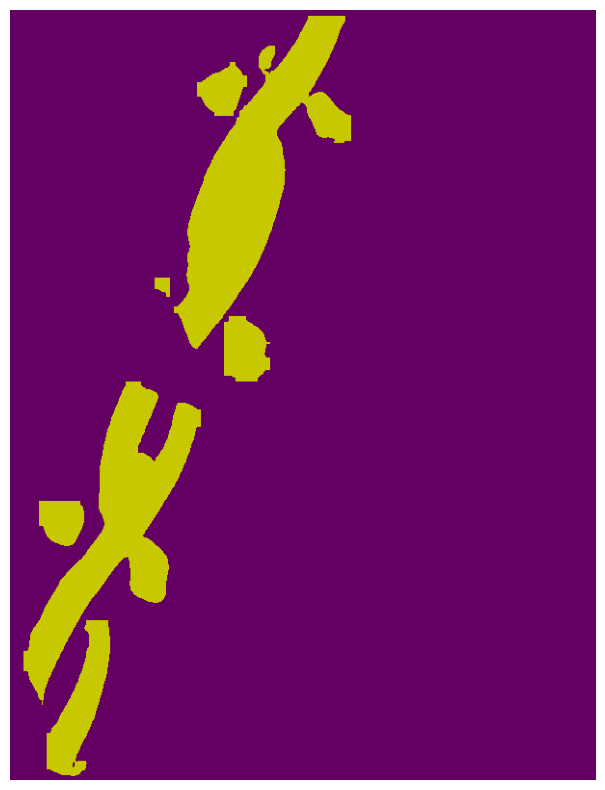

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

masks = get_yolo_masks(
    weights_path="/content/drive/MyDrive/Repair Project/report/results/training/3c/train_250_800_16/weights/best.pt",
    image_path="/content/drive/MyDrive/Repair Project/report/data/3c/test/images/RPf_00481.png"
    )

plot_masks(masks)